# Librerias


In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# ETL



> El primer paso fue extraer las tablas de la página https://indicadores.enacom.gob.ar/datos-abiertos

> Luego se abre el archivo .xlsx y se van transformando a .csv cada pestaña útil del archivo

No se convirtieron todas las tablas, porque varias tenian datos redundantes entre si:
+ `Acc_vel_loc_sinrango` se guarda por tener las localidades de forma mas detallada. Y para disminuir las columnas se utilizan los siguientes rangos:
```
HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
```
+ `Velocidad_sin_rango` tiene la misma información que `Acceso por velocidad` pero menos organizado asi que solo guarda el segundo.
+ `Velocidad % por prov` también se guarda.
+ `Totales VDM` no se utiliza por tener la misma información que las tablas anteriores pero menos detallada.
+ `Accesos_tecnologias_localidad` se guarda.
+ `Total Acceso Por Tecnologia` tiene los mismos datos que `Acceso Por Tecnologia` pero en este último estan mas desglosados asi que se guarda solo este.
+ `Dial-BAf` tiene los mismos datos que `Totales Dial-BAf` pero más desglosados asi que se conserva solo el primero.
+ Juntando `Penetracion-hogares` y `Penetracion-población` se consigue información mas detallada que `Penetracion-totales`, por lo que se descarta esta ultima.
+ `Totales accesos velocidad` tiene la misma información que las primeras tablas asi que se descarta.

+ Y la tabla `Ingresos` se guarda por tener información importante para el negocio.



> Finalmente con python se abren correctamente las tablas creando los dataframes y se ponen a punto según el tipo de dato.







## Carga

### Acc_vel_loc_sinrango = velocidad_loc


In [4]:
velocidad_loc = pd.read_csv('/content/drive/MyDrive/Henry/velociadad_loc.csv', delimiter=';')

In [5]:
velocidad_loc.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ranges = {
    'HASTA 512 kbps': ['0,256 Mbps', '0,5 Mbps', '0,512 Mbps'],
    '+ 512 Kbps - 1 Mbps': ['1 Mbps','0,75 Mbps'],
    '+ 1 Mbps - 6 Mbps': ['1,5 Mbps', '2 Mbps','2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps','3,5 Mbps','4 Mbps', '4,5 Mbps', '5 Mbps'],
    '+ 6 Mbps - 10 Mbps': ['6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps'],
    '+ 10 Mbps - 20 Mbps': ['10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps'],
    '+ 20 Mbps - 30 Mbps': ['20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps','30 Mbps'],
    '+ 30 Mbps': [ '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '38 Mbps','39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps',
                  '49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps','58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '64 Mbps',
                   '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '78 Mbps', '80 Mbps','83 Mbps', '85 Mbps', '90 Mbps', '92 Mbps', '95 Mbps', '98 Mbps',
                   '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 Mbps', '126 Mbps', '130 Mbps', '140 Mbps',
                   '150 Mbps', '155 Mbps', '158 Mbps', '160 Mbps', '164 Mbps', '165 Mbps','180 Mbps', '200 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps',
                   '240 Mbps', '246 Mbps', '250 Mbps', '256 Mbps', '275 Mbps', '300 Mbps','320 Mbps', '325 Mbps', '330 Mbps', '340 Mbps', '350 Mbps',
                    '400 Mbps', '450 Mbps', '480 Mbps', '500 Mbps', '512 Mbps', '520 Mbps', '540 Mbps', '600 Mbps', '680 Mbps', '700 Mbps', '800 Mbps',
                   '850 Mbps','900 Mbps', '999 Mbps', '1024 Mbps', '1000 Mbps']
}

for new_col, old_cols in ranges.items():
    velocidad_loc[new_col] = velocidad_loc[old_cols].sum(axis=1)

velocidad_loc = velocidad_loc.drop(columns=[col for cols in ranges.values() for col in cols])


In [7]:
velocidad_loc.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
       '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
       '+ 30 Mbps'],
      dtype='object')

In [8]:
velocidad_loc.dtypes

Provincia               object
Partido                 object
Localidad               object
Link Indec              object
Otros                  float64
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
dtype: object

In [9]:
velocidad_loc['Provincia'] = velocidad_loc['Provincia'].str.title()

In [10]:
velocidad_loc.head()

,Provincia,Partido,Localidad,Link Indec,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
0,Buenos Aires,25 de Mayo,25 de Mayo,6854100,NaN,2.0,19.0,230.0,663.0,415.0,3443.0,1474.0
1,Buenos Aires,25 de Mayo,Agustín Mosconi,6854010,NaN,0.0,0.0,0.0,59.0,0.0,5.0,0.0
2,Buenos Aires,25 de Mayo,Del Valle,6854020,NaN,1.0,0.0,181.0,10.0,0.0,0.0,0.0
3,Buenos Aires,25 de Mayo,Ernestina,6854030,NaN,0.0,0.0,75.0,0.0,0.0,0.0,0.0
4,Buenos Aires,25 de Mayo,Gobernador Ugarte,6854040,NaN,0.0,0.0,172.0,8.0,0.0,0.0,1.0


### Acceso por velocidad = velocidad_fechas




In [11]:
velocidad_fechas = pd.read_csv('/content/drive/MyDrive/Henry/velocidad_fechas.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [12]:
velocidad_fechas.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26.909,23.962,228.393,239.339,246.144,110.876,4.042.646,93.351,5.011.620
1,2024,4,Capital Federal,516.000,4.544,26.409,48.083,33.925,5.829,1.355.061,0.000,1.474.367
2,2024,4,Catamarca,71.000,209.000,3.065,3.734,4.423,1.827,61.181,77.000,74.587
3,2024,4,Chaco,236.000,477.000,14.811,10.361,6.247,5.729,105.485,4.040,147.386
4,2024,4,Chubut,111.000,1.088,44.276,31.402,22.843,20.196,33.665,16.589,170.170


In [13]:
velocidad_fechas.dtypes

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps       object
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps               object
OTROS                  float64
Total                   object
dtype: object

In [14]:
velocidad_fechas['OTROS'] = velocidad_fechas['OTROS'].replace(np.nan, '0')
columns = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
    '+ 30 Mbps', 'Total', 'OTROS']

for col in columns :
    velocidad_fechas[col] = velocidad_fechas[col].astype(str).str.replace('.', '').str.strip().astype(int)


In [15]:
velocidad_fechas.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909,23962,228393,239339,246144,110876,4042646,93351,5011620
1,2024,4,Capital Federal,5160,4544,26409,48083,33925,5829,1355061,0,1474367
2,2024,4,Catamarca,710,2090,3065,3734,4423,1827,61181,770,74587
3,2024,4,Chaco,2360,4770,14811,10361,6247,5729,105485,404,147386
4,2024,4,Chubut,1110,1088,44276,31402,22843,20196,33665,16589,170170


### Velocidad % por prov = velocidad_promedio








In [16]:
velocidad_promedio = pd.read_csv('/content/drive/MyDrive/Henry/velocidad_promedio.csv', delimiter=';')

In [17]:
velocidad_promedio.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,"158,49"
1,2023,4,Capital Federal,"234,44"
2,2023,4,Catamarca,"89,40"
3,2023,4,Chaco,"107,14"
4,2023,4,Chubut,"20,29"


In [18]:
velocidad_promedio.dtypes

Año                        int64
Trimestre                  int64
Provincia                 object
Mbps (Media de bajada)    object
dtype: object

In [19]:
velocidad_promedio['Mbps (Media de bajada)'] = velocidad_promedio['Mbps (Media de bajada)'].str.replace(',', '.').str.strip().astype(float)

In [20]:
velocidad_promedio.dtypes

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

In [21]:
velocidad_promedio.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.49
1,2023,4,Capital Federal,234.44
2,2023,4,Catamarca,89.40
3,2023,4,Chaco,107.14
4,2023,4,Chubut,20.29


### Accesos_tecnologias_localidad = acceso_localidad

In [22]:
acceso_localidad = pd.read_csv('/content/drive/MyDrive/Henry/acceso_localidad.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [23]:
acceso_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4.600,-,3,-,742,-,726,6.827
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,-,-,-,10,1,-,-,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,-,-,-,-,-,-,-,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,-,782,-,496,16,-,-,185,1.479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,-,-,-,-,-,-,-,6,6


In [24]:
acceso_localidad['Provincia'] = acceso_localidad['Provincia'].str.title()

In [25]:
acceso_localidad.dtypes

Provincia          object
Partido            object
Localidad          object
Link Indec         object
 ADSL              object
 CABLEMODEM        object
 DIAL UP           object
 FIBRA OPTICA      object
 OTROS             object
 SATELITAL         object
 WIMAX             object
 WIRELESS          object
 Total general     object
dtype: object

In [26]:
acceso_localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', ' ADSL ',
       ' CABLEMODEM ', ' DIAL UP ', ' FIBRA OPTICA ', ' OTROS ', ' SATELITAL ',
       ' WIMAX ', ' WIRELESS ', ' Total general '],
      dtype='object')

In [27]:
columns = [' ADSL ', ' CABLEMODEM ', ' DIAL UP ', ' FIBRA OPTICA ', ' OTROS ', ' SATELITAL ', ' WIMAX ', ' WIRELESS ', ' Total general ']

for col in columns :
    acceso_localidad[col] = acceso_localidad[col].str.replace('.', '').str.replace('-', '0').str.strip().astype(int)

In [28]:
acceso_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,Buenos Aires,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827
1,Buenos Aires,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,Buenos Aires,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,Buenos Aires,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,Buenos Aires,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


###  Acceso Por Tecnologia = tipo_acceso

In [29]:
tipo_acceso = pd.read_csv('/content/drive/MyDrive/Henry/tipo_acceso.csv', skiprows=[961, 962], delimiter=';', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [30]:
tipo_acceso

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223.391,2.797.700,1.784.593,137.993,67.943,5.011.620
1,2023,4,Capital Federal,58.700,1.198.835,182.520,4.492,29.820,1.474.367
2,2023,4,Catamarca,6.669,11.016,55.437,1.384,81.000,74.587
3,2023,4,Chaco,14.000,60.277,62.301,8.404,2.404,147.386
4,2023,4,Chubut,26.306,77.217,26.174,30.543,9.930,170.170
...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
956,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
957,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
958,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038


In [31]:
tipo_acceso.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [32]:
tipo_acceso = tipo_acceso.astype(str)

In [33]:
tipo_acceso.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

In [34]:
columns = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

for col in columns :
    tipo_acceso[col] = tipo_acceso[col].str.replace('.', '').str.replace(' *', '').str.strip().astype(int)

In [35]:
tipo_acceso.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
1,2023,4,Capital Federal,58700,1198835,182520,4492,2982,1474367
2,2023,4,Catamarca,6669,11016,55437,1384,810,74587
3,2023,4,Chaco,14000,60277,62301,8404,2404,147386
4,2023,4,Chubut,26306,77217,26174,30543,993,170170


### Dial-BAf = total_banda_ancha

In [36]:
total_banda_ancha = pd.read_csv('/content/drive/MyDrive/Henry/total_banda_ancha.csv', delimiter=';', usecols=[0, 1, 2, 3, 4, 5])

In [37]:
total_banda_ancha

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5.005.720,5.90,5.011.620
1,2023,4,Capital Federal,1.472.317,2.05,1.474.367
2,2023,4,Catamarca,74.586,1.00,74.587
3,2023,4,Chaco,147.381,5.00,147.386
4,2023,4,Chubut,169.313,857.00,170.170
...,...,...,...,...,...,...
955,2014,1,Santa Cruz,26.304,460.00,26.764
956,2014,1,Santa Fe,506.000,612.00,506.612
957,2014,1,Santiago Del Estero,37.124,9.00,37.133
958,2014,1,Tierra Del Fuego,27.272,766.00,28.038


In [38]:
total_banda_ancha.dtypes

Año                   int64
Trimestre             int64
Provincia            object
Banda ancha fija     object
Dial up             float64
Total                object
dtype: object

In [39]:
columns = ['Banda ancha fija', 'Total']

for col in columns :
    total_banda_ancha[col] = total_banda_ancha[col].astype(str).str.replace('nan', '0').str.replace('.', '').str.replace(' *', '').str.strip().astype(int)

In [40]:
total_banda_ancha.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5005720,5.90,5011620
1,2023,4,Capital Federal,1472317,2.05,1474367
2,2023,4,Catamarca,74586,1.00,74587
3,2023,4,Chaco,147381,5.00,147386
4,2023,4,Chubut,169313,857.00,170170


### Penetración hogares = cada_100_hogares

In [41]:
cada_100_hogares = pd.read_csv('/content/drive/MyDrive/Henry/cada_100_hogares.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [42]:
cada_100_hogares.dropna(inplace=True)

In [43]:
cada_100_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023.0,4.0,Buenos Aires,"80,96"
1,2023.0,4.0,Capital Federal,"117,02"
2,2023.0,4.0,Catamarca,"68,63"
3,2023.0,4.0,Chaco,"44,35"
4,2023.0,4.0,Chubut,"84,96"
...,...,...,...,...
955,2014.0,1.0,Santa Cruz,"28,94"
956,2014.0,1.0,Santa Fe,"47,85"
957,2014.0,1.0,Santiago Del Estero,"16,31"
958,2014.0,1.0,Tierra Del Fuego,"63,97"


In [44]:
cada_100_hogares.dtypes

Año                             float64
 Trimestre                      float64
 Provincia                       object
Accesos por cada 100 hogares     object
dtype: object

In [45]:
cada_100_hogares['Año'] = cada_100_hogares['Año'].astype(int)
cada_100_hogares[' Trimestre '] = cada_100_hogares[' Trimestre '].astype(int)
cada_100_hogares['Accesos por cada 100 hogares'] = cada_100_hogares['Accesos por cada 100 hogares'].str.replace(',', '.').str.strip().astype(float)

In [46]:
cada_100_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96


### Penetración población = cada_100_hab

In [47]:
cada_100_hab = pd.read_csv('/content/drive/MyDrive/Henry/cada_100_hab.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [48]:
cada_100_hab.dropna(inplace=True)

In [49]:
cada_100_hab

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023.0,4.0,Buenos Aires,"27,68"
1,2023.0,4.0,Capital Federal,"47,80"
2,2023.0,4.0,Catamarca,"17,46"
3,2023.0,4.0,Chaco,"11,85"
4,2023.0,4.0,Chubut,"26,04"
...,...,...,...,...
955,2014.0,1.0,Santa Cruz,"8,68"
956,2014.0,1.0,Santa Fe,"15,08"
957,2014.0,1.0,Santiago Del Estero,"4,06"
958,2014.0,1.0,Tierra Del Fuego,"19,10"


In [50]:
cada_100_hab['Año'] = cada_100_hab['Año'].astype(int)
cada_100_hab[' Trimestre '] = cada_100_hab[' Trimestre '].astype(int)
cada_100_hab['Accesos por cada 100 hab'] = cada_100_hab['Accesos por cada 100 hab'].str.replace(',', '.').str.strip().astype(float)

In [51]:
cada_100_hab.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04


### Ingresos = Ganancias


In [206]:
ganancias = pd.read_csv('/content/drive/MyDrive/Henry/ganancias.csv', delimiter=';', usecols=[0, 1, 2, 3])

In [207]:
ganancias.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,"167.376.014,80",Oct-Dic 2023
1,2023,3,"133.106.593,41",Jul-Sept 2023
2,2023,2,"118.060.280,28",Jun-Mar 2023
3,2033,1,"104.134.992,81",Ene-Mar 2023
4,2022,4,"72.443.482,99",Oct-Dic 2022


In [208]:
ganancias.columns

Index(['Año', ' Trimestre ', 'Ingresos (miles de pesos)', ' Periodo '], dtype='object')

In [209]:
ganancias.drop([' Periodo '], axis=1, inplace=True)

In [210]:
ganancias['Ingresos (miles de pesos)'] = ganancias['Ingresos (miles de pesos)'].astype(str).str.replace(',', '.').str.replace('.', '').str.strip().astype(float)

In [211]:
ganancias.loc[3] = [2.023000e+03, 1.000000e+00, 1.041350e+10]

In [212]:
ganancias.head()

,Año,Trimestre,Ingresos (miles de pesos)
0,2023,4,1.673760e+10
1,2023,3,1.331066e+10
2,2023,2,1.180603e+10
3,2023,1,1.041350e+10
4,2022,4,7.244348e+09


## Modificación

### Año | Trimestre | Provincia --> A_T_P

Se comienza uniendo en una sola tabla todas las columnas impotantes de las tablas que tiene las columnas
```
Año | Trimestre | Provincia
```
+ velocidad_fechas
+ velocidad_promedio
+ tipo_acceso
+ cada_100_hogares
+ cada_100_hab

In [58]:
result = pd.merge(velocidad_promedio, velocidad_fechas, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [59]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  960 non-null    float64
 4   HASTA 512 kbps          960 non-null    float64
 5   + 512 Kbps - 1 Mbps     960 non-null    float64
 6   + 1 Mbps - 6 Mbps       960 non-null    float64
 7   + 6 Mbps - 10 Mbps      960 non-null    float64
 8   + 10 Mbps - 20 Mbps     960 non-null    float64
 9   + 20 Mbps - 30 Mbps     960 non-null    float64
 10  + 30 Mbps               960 non-null    float64
 11  OTROS                   960 non-null    float64
 12  Total                   960 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 102.5+ KB


In [82]:
result = result.rename(columns={'OTROS':'Otros'})
result.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total
0,2023,4,Buenos Aires,158.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4,Capital Federal,234.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,4,Catamarca,89.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,4,Chaco,107.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,4,Chubut,20.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
result2 = pd.merge(cada_100_hab, cada_100_hogares, on=['Año', ' Trimestre ', ' Provincia '], how='outer')

In [87]:
result2 = result2.rename(columns={' Trimestre ':'Trimestre', ' Provincia ': 'Provincia'})
result2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,27.68,80.96
1,2023,4,Capital Federal,47.80,117.02
2,2023,4,Catamarca,17.46,68.63
3,2023,4,Chaco,11.85,44.35
4,2023,4,Chubut,26.04,84.96


In [88]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           961 non-null    int64  
 1   Trimestre                     961 non-null    int64  
 2   Provincia                     961 non-null    object 
 3   Accesos por cada 100 hab      960 non-null    float64
 4   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 37.7+ KB


In [89]:
result2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,27.68,80.96
1,2023,4,Capital Federal,47.80,117.02
2,2023,4,Catamarca,17.46,68.63
3,2023,4,Chaco,11.85,44.35
4,2023,4,Chubut,26.04,84.96


In [90]:
result3 = pd.merge(total_banda_ancha, result, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [91]:
result3.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total_x,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total_y
0,2023,4,Buenos Aires,5005720.0,5.90,5011620.0,158.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4,Capital Federal,1472317.0,2.05,1474367.0,234.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,4,Catamarca,74586.0,1.00,74587.0,89.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,4,Chaco,147381.0,5.00,147386.0,107.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,4,Chubut,169313.0,857.00,170170.0,20.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1032 non-null   int64  
 1   Trimestre               1032 non-null   int64  
 2   Provincia               1032 non-null   object 
 3   Banda ancha fija        960 non-null    float64
 4   Dial up                 958 non-null    float64
 5   Total_x                 960 non-null    float64
 6   Mbps (Media de bajada)  960 non-null    float64
 7   HASTA 512 kbps          960 non-null    float64
 8   + 512 Kbps - 1 Mbps     960 non-null    float64
 9   + 1 Mbps - 6 Mbps       960 non-null    float64
 10  + 6 Mbps - 10 Mbps      960 non-null    float64
 11  + 10 Mbps - 20 Mbps     960 non-null    float64
 12  + 20 Mbps - 30 Mbps     960 non-null    float64
 13  + 30 Mbps               960 non-null    float64
 14  Otros                   960 non-null    

In [93]:
A_T_P = pd.merge(result2, result3, on=['Año', 'Trimestre', 'Provincia'], how='outer')

In [94]:
A_T_P.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Banda ancha fija,Dial up,Total_x,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total_y
0,2023,4,Buenos Aires,27.68,80.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4,Capital Federal,47.80,117.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,4,Catamarca,17.46,68.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,4,Chaco,11.85,44.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,4,Chubut,26.04,84.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
A_T_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1944 non-null   int64  
 1   Trimestre                     1944 non-null   int64  
 2   Provincia                     1944 non-null   object 
 3   Accesos por cada 100 hab      960 non-null    float64
 4   Accesos por cada 100 hogares  960 non-null    float64
 5   Banda ancha fija              960 non-null    float64
 6   Dial up                       958 non-null    float64
 7   Total_x                       960 non-null    float64
 8   Mbps (Media de bajada)        960 non-null    float64
 9   HASTA 512 kbps                960 non-null    float64
 10  + 512 Kbps - 1 Mbps           960 non-null    float64
 11  + 1 Mbps - 6 Mbps             960 non-null    float64
 12  + 6 Mbps - 10 Mbps            960 non-null    float64
 13  + 1

### Provincia | Partido | Localidad --> P_P_L

Se unen las tablas acceso_localidad y velocidad_loc para tener en una tabla todo lo relevante a el lugar geografico puntual.

In [71]:
P_P_L = pd.merge(acceso_localidad, velocidad_loc, on=['Provincia', 'Partido', 'Localidad'], how='outer')

In [72]:
P_P_L = P_P_L.rename(columns={' ADSL ' : 'ADSL', ' CABLEMODEM ':'Cablemodem', ' DIAL UP ': 'Dail Up', ' FIBRA OPTICA ' : 'Fibra Optica',
                                      ' OTROS ': 'Otros1', ' SATELITAL ': 'Satelital', ' WIMAX ':'Wimax', ' WIRELESS ': 'Wireless',
                                      ' Total general ': 'Total general', 'Link Indec_x': 'Link Indec'})
P_P_L.drop(['Link Indec_y'], axis = 1, inplace = True)

In [73]:
P_P_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3166 entries, 0 to 3165
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            3166 non-null   object 
 1   Partido              3166 non-null   object 
 2   Localidad            3166 non-null   object 
 3   Link Indec           3076 non-null   object 
 4   ADSL                 3076 non-null   float64
 5   Cablemodem           3076 non-null   float64
 6   Dail Up              3076 non-null   float64
 7   Fibra Optica         3076 non-null   float64
 8   Otros1               3076 non-null   float64
 9   Satelital            3076 non-null   float64
 10  Wimax                3076 non-null   float64
 11  Wireless             3076 non-null   float64
 12  Total general        3076 non-null   float64
 13  Otros                877 non-null    float64
 14  HASTA 512 kbps       3066 non-null   float64
 15  + 512 Kbps - 1 Mbps  3066 non-null   f

In [74]:
P_P_L.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,Cablemodem,Dail Up,Fibra Optica,Otros1,Satelital,...,Wireless,Total general,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps
0,Buenos Aires,25 de Mayo,25 de Mayo,6854100,756.0,4600.0,0.0,3.0,0.0,742.0,...,726.0,6827.0,NaN,2.0,19.0,230.0,663.0,415.0,3443.0,1474.0
1,Buenos Aires,25 de Mayo,Del Valle,6854020,181.0,0.0,0.0,0.0,10.0,1.0,...,0.0,192.0,NaN,1.0,0.0,181.0,10.0,0.0,0.0,0.0
2,Buenos Aires,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,181.0,181.0,NaN,0.0,0.0,172.0,8.0,0.0,0.0,1.0
3,Buenos Aires,25 de Mayo,Norberto de la Riestra,6854060,0.0,782.0,0.0,496.0,16.0,0.0,...,185.0,1479.0,NaN,0.0,0.0,223.0,916.0,322.0,29.0,20.0
4,Buenos Aires,25 de Mayo,Lucas Monteverde,6854050,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,0.0


### Ganancia

> Esta tabla tiene todos sus datos pero esos datos no representan directamente las ganancias porque tiene el factor de la inflación del país es por esto que se agrega una columna de valor en ingresos en dolares

In [222]:
df = pd.read_excel('/content/drive/MyDrive/Henry/Conscotiza.xlsx')

In [226]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df['Trimestre'] = df['Fecha'].dt.to_period('Q').dt.quarter
df['Año'] = df['Fecha'].dt.to_period('Y').astype(str)
df['Comprador'] = df['Comprador'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)
df['Comprador'] = df['Comprador'].str.replace(',', '').astype(float)
dolar = df.groupby(['Año', 'Trimestre'])['Comprador'].mean().reset_index()
dolar.columns = ['Año', 'Trimestre', 'Promedio_Dolar']


In [227]:
ganancias.head()

,Año,Trimestre,Ingresos (miles de pesos)
0,2023,4,1.673760e+10
1,2023,3,1.331066e+10
2,2023,2,1.180603e+10
3,2023,1,1.041350e+10
4,2022,4,7.244348e+09


In [228]:
dolar.head()

,Año,Trimestre,Promedio_Dolar
0,2014,1,7.549967
1,2014,2,8.007345
2,2014,3,8.247687
3,2014,4,8.459448
4,2015,1,8.636610


In [229]:
ganancias = ganancias.rename(columns={' Trimestre ':'Trimestre'})

In [230]:
dolar['Año']=dolar['Año'].astype(int)
dolar['Trimestre']=dolar['Trimestre'].astype(int)

In [231]:
ganancias.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
dtype: object

In [232]:
dolar.dtypes

Año                 int64
Trimestre           int64
Promedio_Dolar    float64
dtype: object

In [236]:
ganancia = pd.merge(ganancias, dolar, on = ['Año', 'Trimestre'])

In [240]:
ganancia['Ingresos (miles de dolares)'] = ganancia['Ingresos (miles de pesos)']/ganancia['Promedio_Dolar']
ganancia.drop(['Promedio_Dolar'], axis = 1, inplace=True)

In [242]:
ganancia.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de dolares)
0,2023,4,1.673760e+10,3.787961e+07
1,2023,3,1.331066e+10,4.278557e+07
2,2023,2,1.180603e+10,5.103629e+07
3,2023,1,1.041350e+10,5.443413e+07
4,2022,4,7.244348e+09,4.496328e+07


# EDA

## A_T_P

### Información general

In [96]:
A_T_P.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,1944.0,2018.567901,2.919140,2014.00,2016.0000,2019.000,2021.0000,2024.00
Trimestre,1944.0,2.518519,1.123678,1.00,2.0000,3.000,4.0000,4.00
Accesos por cada 100 hab,960.0,15.393969,9.169026,2.68,8.7650,13.420,19.6550,52.24
Accesos por cada 100 hogares,960.0,51.662552,23.898050,9.35,32.8575,48.820,65.1175,124.06
Banda ancha fija,960.0,360625.509375,776137.444959,12193.00,58923.2500,110473.500,188350.2500,5005720.00
Dial up,958.0,151.982398,231.650539,0.00,2.0060,16.500,246.7500,998.00
Total_x,960.0,361541.136458,777895.394867,12557.00,59000.2500,111138.500,188351.7500,5011620.00
Mbps (Media de bajada),960.0,21.615656,29.340381,2.57,4.6850,8.885,25.6825,234.44
HASTA 512 kbps,960.0,2805.332292,10350.165389,60.00,357.5000,1030.000,2425.0000,199768.00
+ 512 Kbps - 1 Mbps,960.0,9614.207292,20359.615420,0.00,1308.0000,3511.000,8179.7500,171244.00


>

### Faltantes

Al hacer el merge de las tablas se utilizó **how='outer'**, es decir un outer join. Se decidio hacer asi para no perder muchos registros, ya que existian muchos periodos de tiempo que no coincidian entre las tablas. Es por esto que se generaron mucho NAN.

<Axes: >

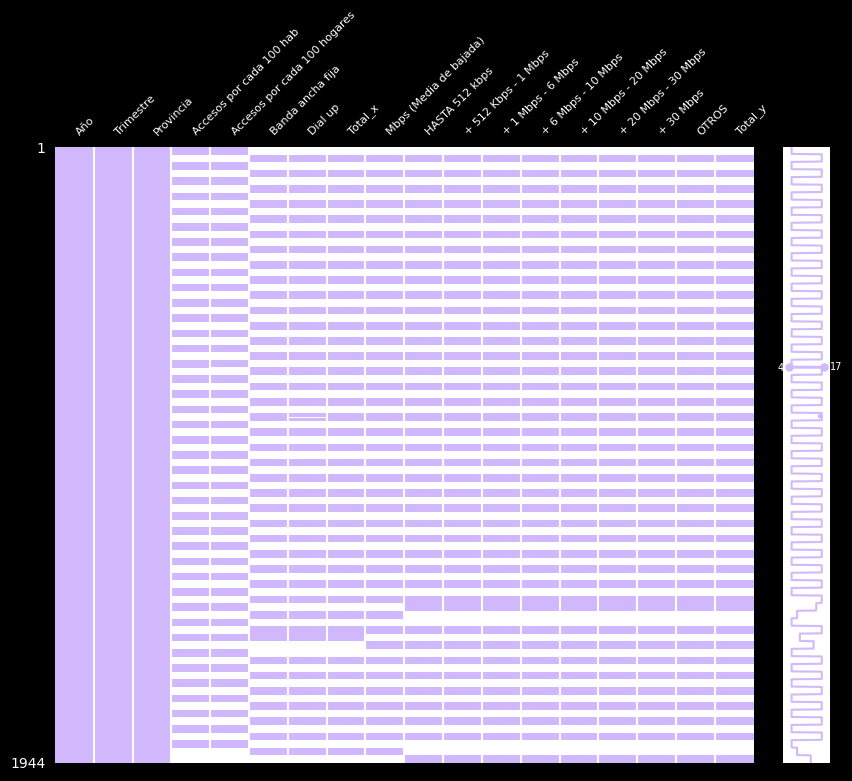

In [76]:
msno.matrix(A_T_P.sort_values(by=['Año', 'Trimestre']), figsize=(10, 8), color=(0.823, 0.722, 0.992), fontsize=8) # Se orden por fechas para ver cronológicamente que datos faltan

> Se puede ver como los datos se registran casi siempre trimestre de por medio, y que en las tablas De cada 100 habitantes y cada 100 hogares se registraron en los trimestres que no se registraban los otros datos.

### Duplicados

In [77]:
A_T_P[A_T_P.duplicated()]

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,Banda ancha fija,Dial up,Total_x,Mbps (Media de bajada),HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y


> En esta tabla no hay duplicados.

###  Distribución de variables numéricas

> Estas columnas se analizan teniendo en cuenta que cada registro corresponde a una prvincia en cierto trimestre de cierto año. Por eso se trata de enfatizar que los histogramas de algunas columnas representan conteos de conteos,es decir, el histograma arma rangos de cantidades y despues se suman todas las cantidades que entren en ese rango


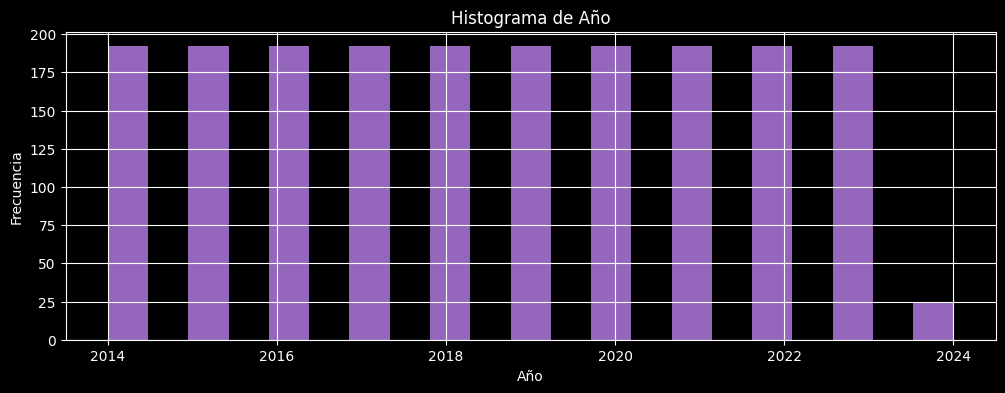

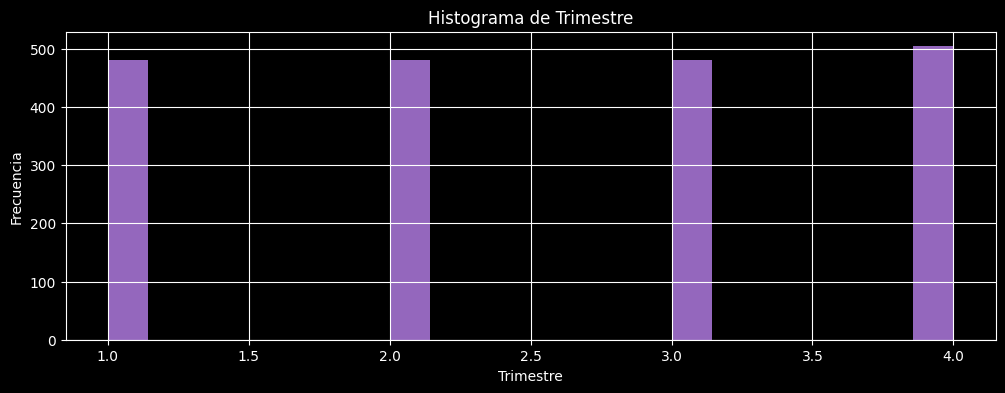

In [97]:
columnas = ['Año', 'Trimestre']
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=21,color='tab:purple')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Analizando las fechas de la tabla, de cada columna se puede decir:

+ `Año` : el periodo de las muestras es de 10 años, de 2014 a 2024, pero en 2024 (año actual) se tienen muy pocos datos, probablemente solo el primer trimestre.
+ `Trimestre` : Se tiene ligeramente más datos del cuarto trimestre.

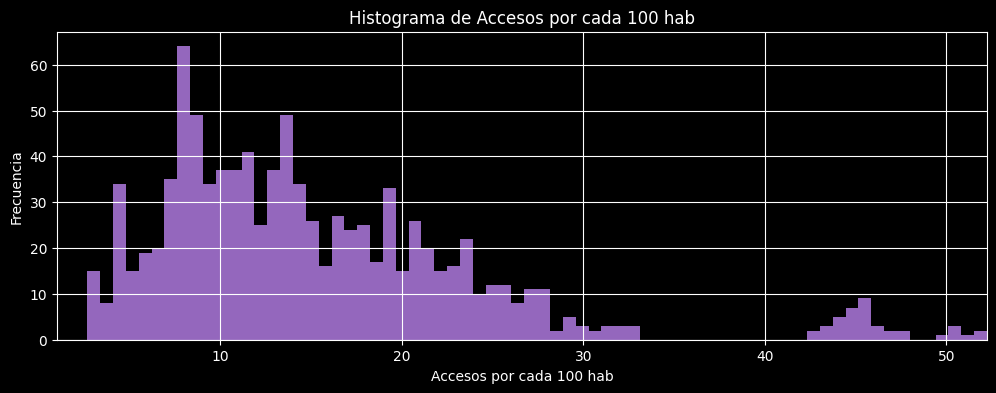

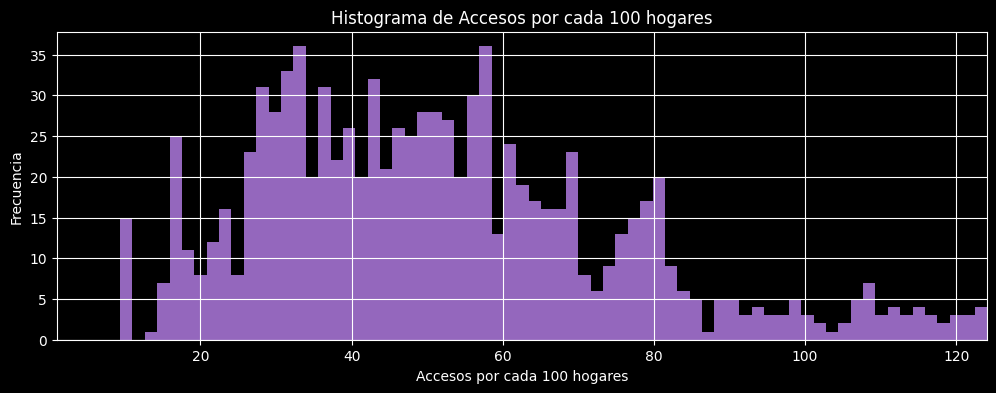

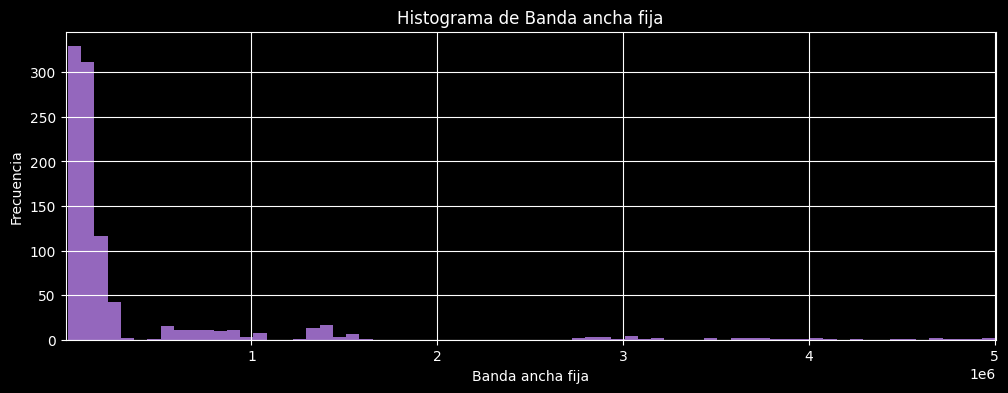

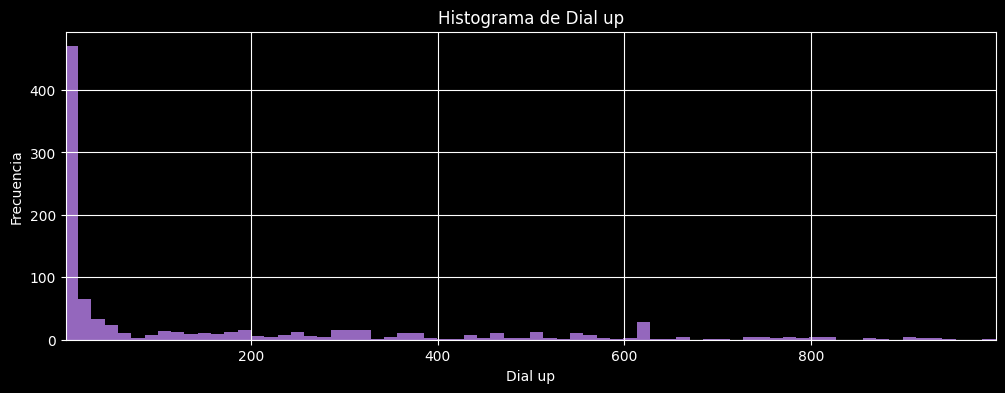

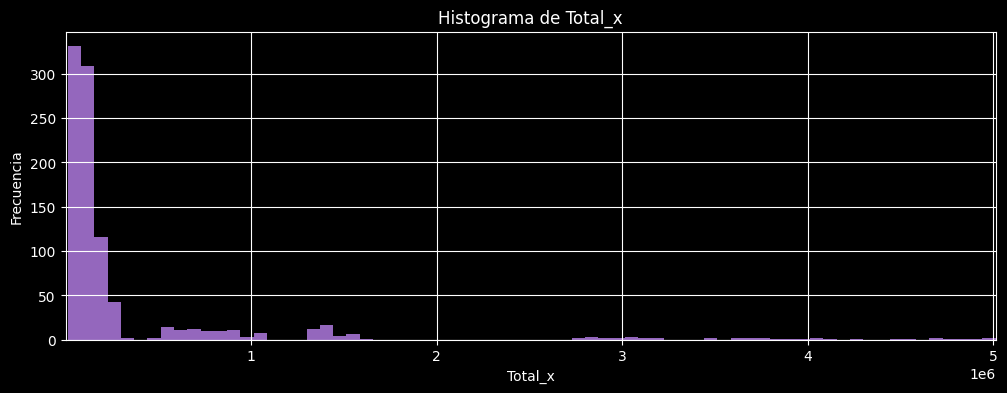

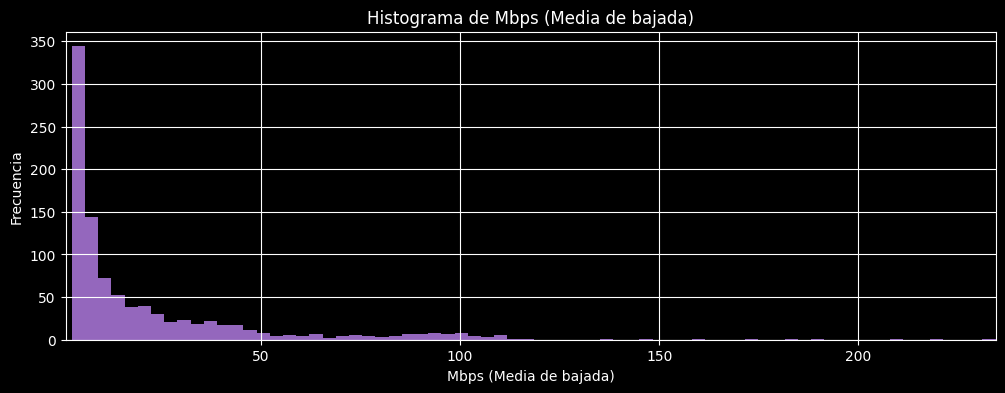

In [98]:
columnas = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Banda ancha fija', 'Dial up', 'Total_x', 'Mbps (Media de bajada)']
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, A_T_P[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Analizando las primeras variables numéricas de la tabla (eliminando los valores 0 para poder ver la distribuciones significantes) de cada columna se puede decir:

+ `Accesos por cada 100 hab` : el rango sobrepasa ligeramente el valor 50, pero hay muy pocos datos (casi ninguno) de 33 a 42 aproximadamente y los conteos se concentran al rededor del valor 10.

+ `Accesos por cada 100 hogares` : esta distribución es un poco más pareja, los conteos se concentran en un gran rango de valores entre 20 y 80, pero sigue habiendo cantidades significativas hasta el valor 120.

+ `Banda ancha fija` : hay varios outliers, los valores mas bajos rondan al rededor de los 10 mil mietras que los mas altos estan en el orden de los 5 millones. Y el grueso de los valores relevantes se agrupan por debajo del medio millón.

+ `Dial up` : nuevamente se tiene mucho outliers en un rango de 1 a cerca de un millon y los valores se concentran en los mas bajos.

+ `Total_x` : tambien hay varios outliers y con algunos valores de hasta 5 millones

+ `Mbps (Media de bajada)` : en el promedio de bajada se ve que la distribición se acumula en los valores más bajos. Esta columna ya no son conteos si no que son el promedio del valor de los Mbps, entonces desde ya se puede concluir que la media es repetidamente en muchos lugares muy baja, lo que da lugar a mejorar el servicio ampliando el negocio.



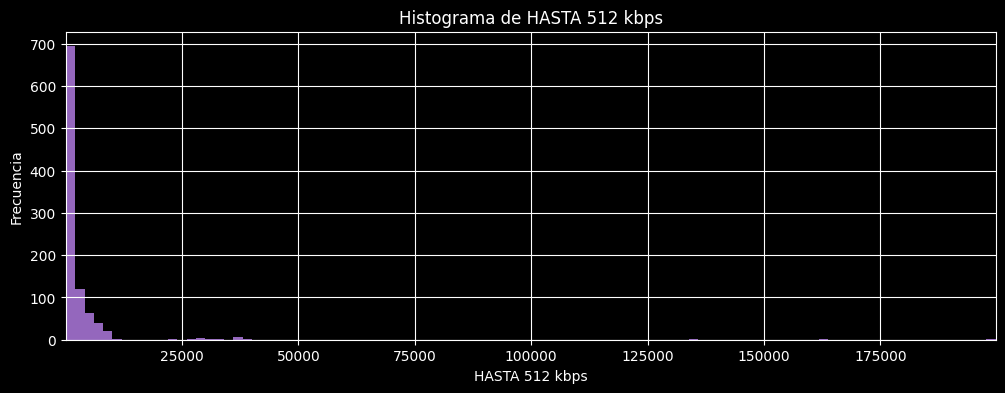

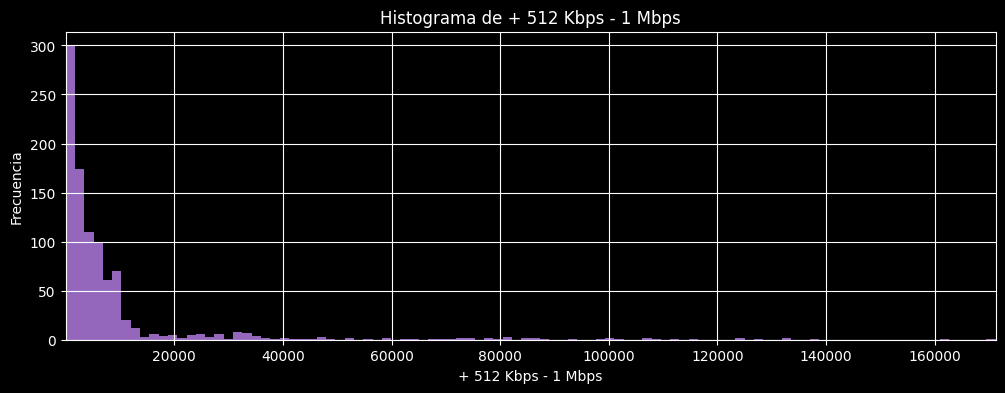

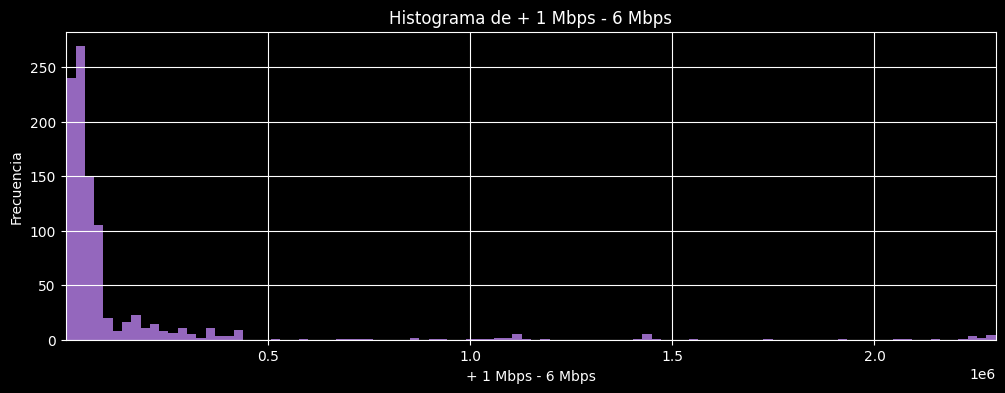

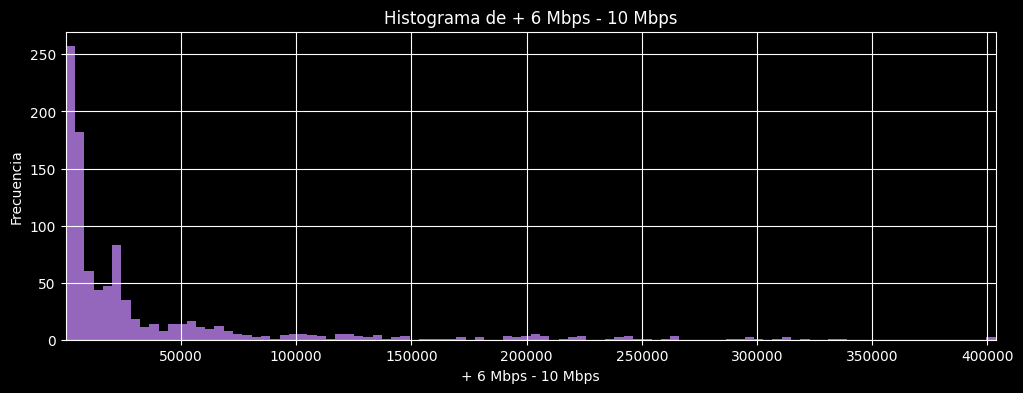

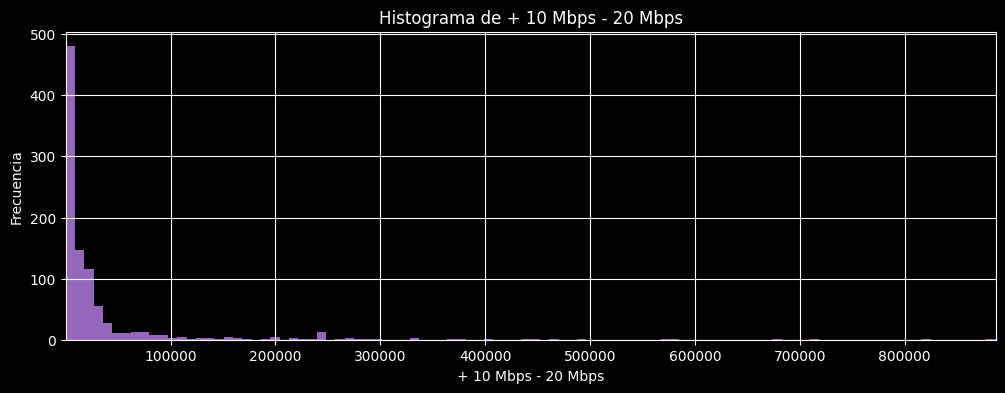

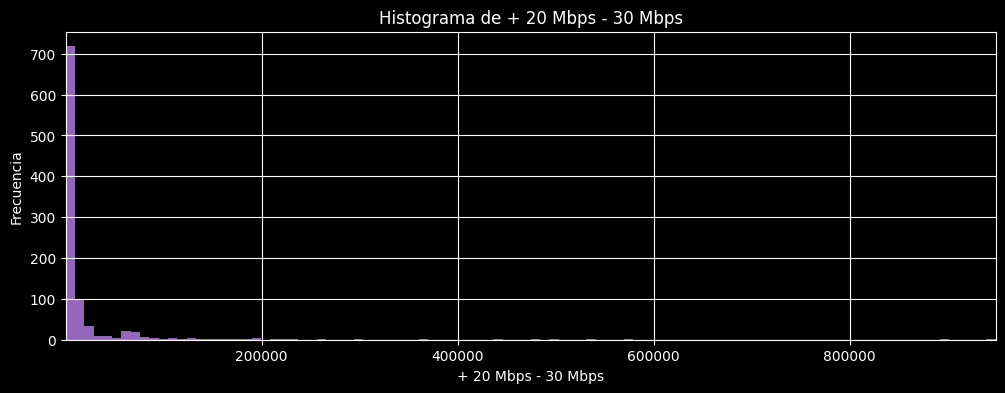

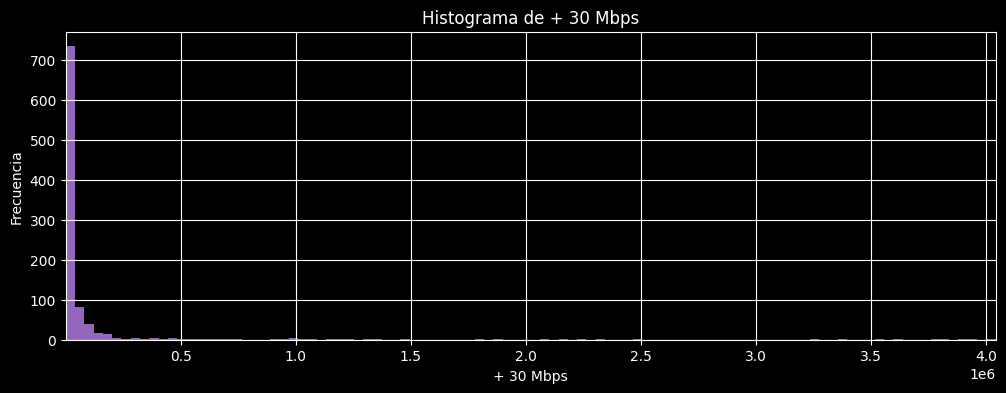

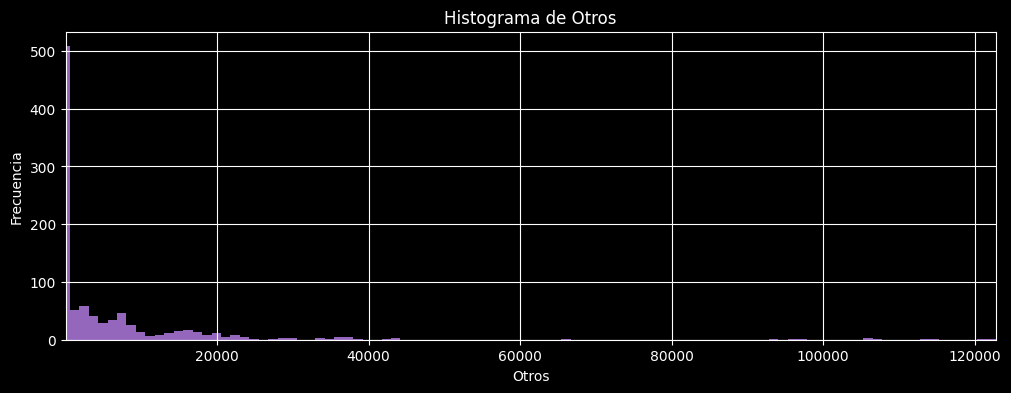

In [99]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros' ]
for i in columnas:
    plt.figure(figsize=(12,4))
    A_T_P[i].hist(bins=100,color='tab:purple')
    plt.xlim(1, A_T_P[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> En esta parte de la tabla se puede ver como todos los rangos tienen una distribución similar, con los datos acumulandose en cantidades bajas pero con algunos outliers bastante marcados, como por ejemplo en el rango de 1 a 6 Mbps que algunos lugares en cierto trimestre de coerto año llegaron a mas de 2 millones de conteos.

## P_P_L

### Información general

In [100]:
P_P_L.describe().T

,count,mean,std,min,25%,50%,75%,max
ADSL,3076.0,271.908322,1550.899791,0.0,0.0,0.0,78.25,58700.0
Cablemodem,3076.0,1957.910273,23152.117338,0.0,0.0,0.0,8.50,1198835.0
Dail Up,3076.0,3.833875,43.153830,0.0,0.0,0.0,0.00,2050.0
Fibra Optica,3076.0,1270.540637,8467.801469,0.0,0.0,1.0,152.00,269623.0
Otros1,3076.0,57.809818,793.944335,0.0,0.0,0.0,0.00,27703.0
Satelital,3076.0,0.972692,13.648046,0.0,0.0,0.0,1.00,742.0
Wimax,3076.0,0.711313,15.093030,0.0,0.0,0.0,0.00,444.0
Wireless,3076.0,190.429129,712.357143,0.0,0.0,28.0,127.00,19906.0
Total general,3076.0,3754.116060,31191.000749,0.0,27.0,167.5,1048.25,1474367.0
Otros,877.0,337.049031,2305.905335,-2.0,1.0,8.0,72.00,57702.0


### Faltantes

<Axes: >

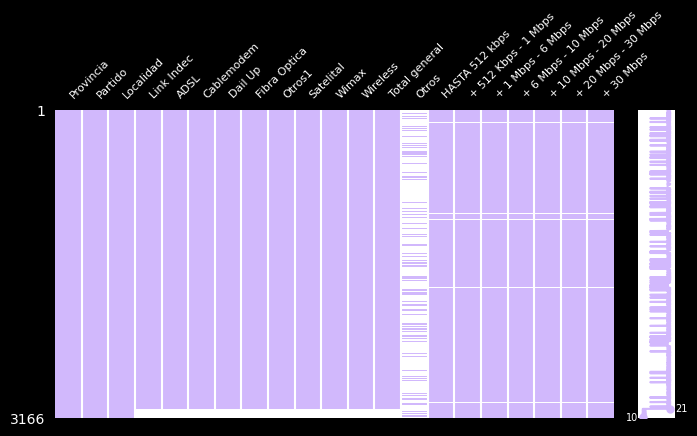

In [105]:
msno.matrix(P_P_L, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

> Se analiza eliminar la columna otros por tener tantos faltantes

<Axes: >

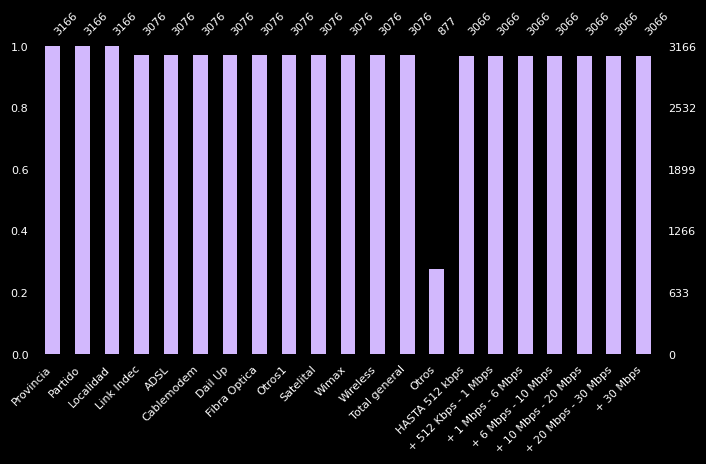

In [106]:
msno.bar(P_P_L, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

In [103]:
P_P_L['Otros'].describe()

count      877.000000
mean       337.049031
std       2305.905335
min         -2.000000
25%          1.000000
50%          8.000000
75%         72.000000
max      57702.000000
Name: Otros, dtype: float64

> Al final no se elimina la columna porque tiene valores grandes que pueden ser un punto util para el analisis de negocio.


### Duplicados

In [247]:
P_P_L[P_P_L.duplicated()]

,Provincia,Partido,Localidad,Link Indec,ADSL,Cablemodem,Dail Up,Fibra Optica,Otros1,Satelital,...,Wireless,Total general,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps


###  Distribución de variables numéricas

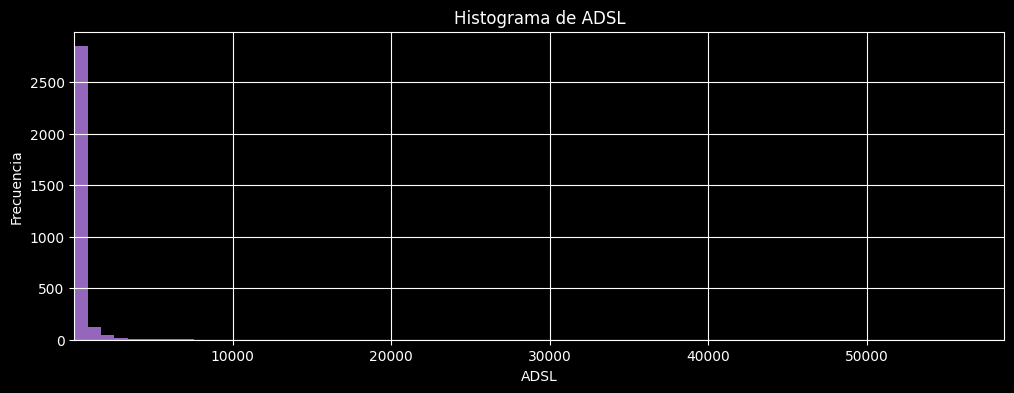

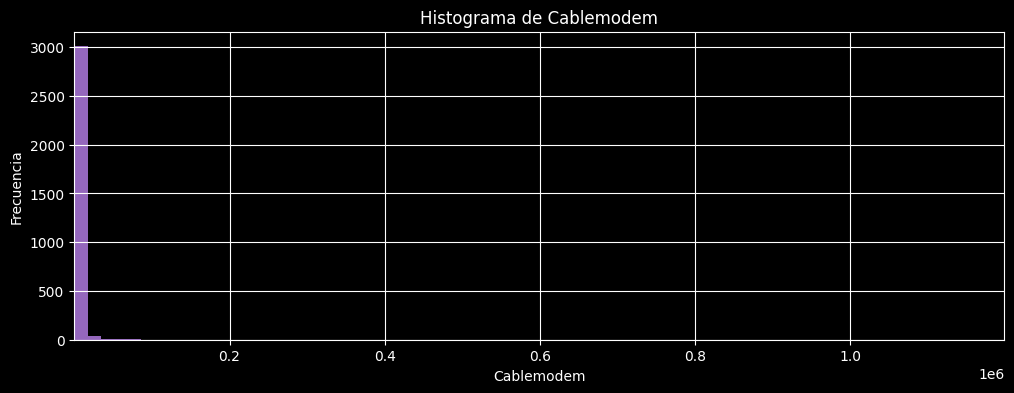

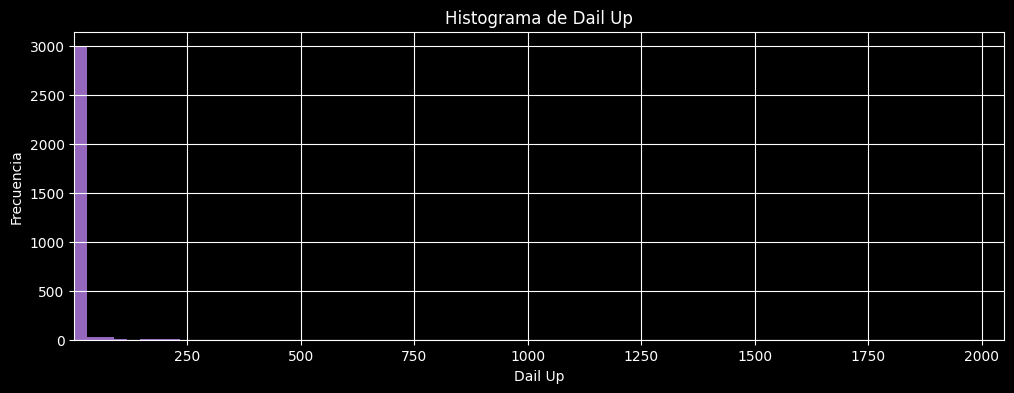

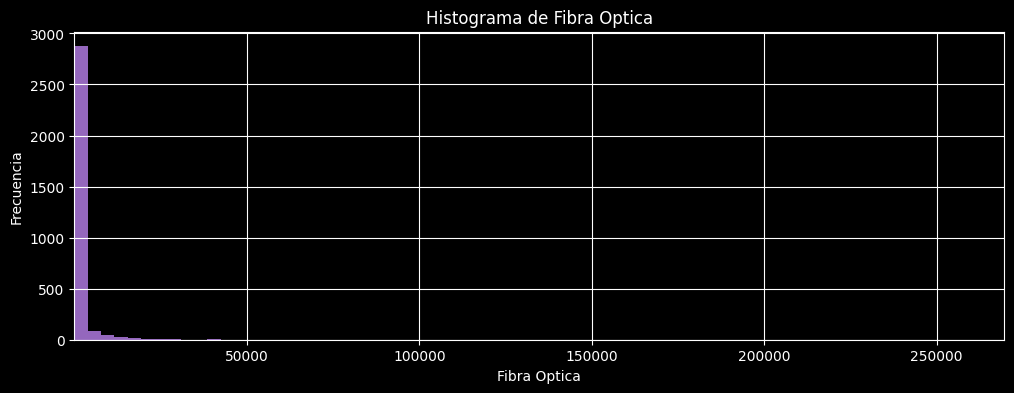

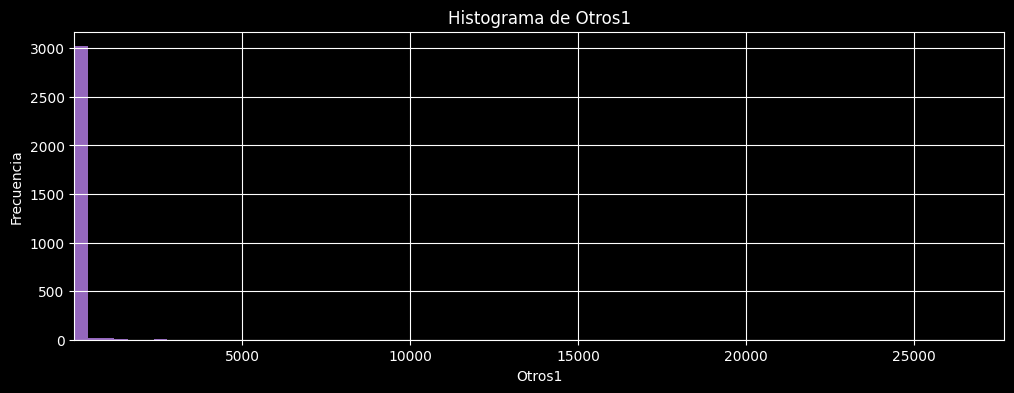

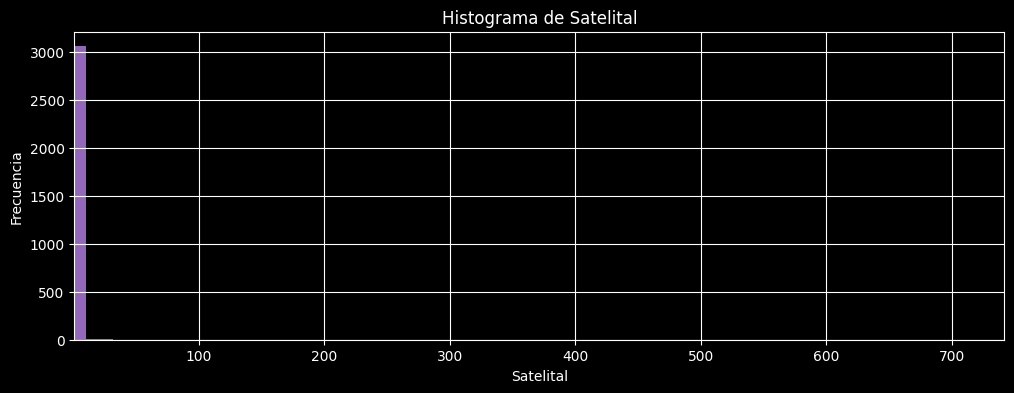

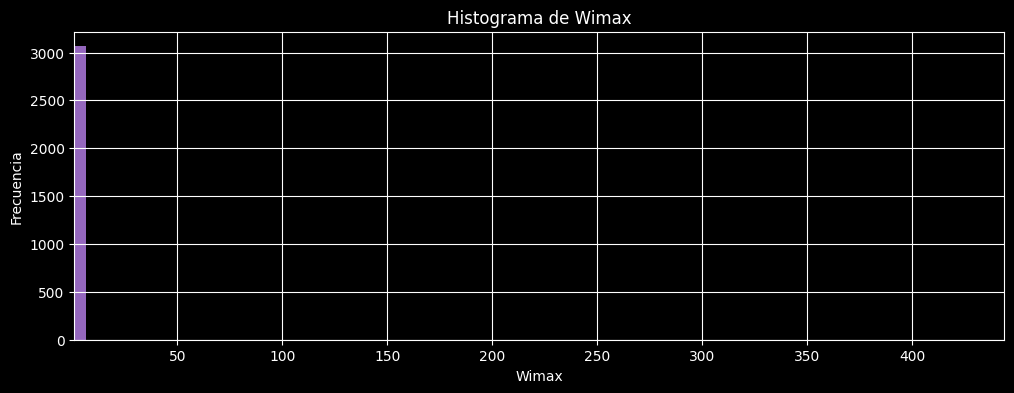

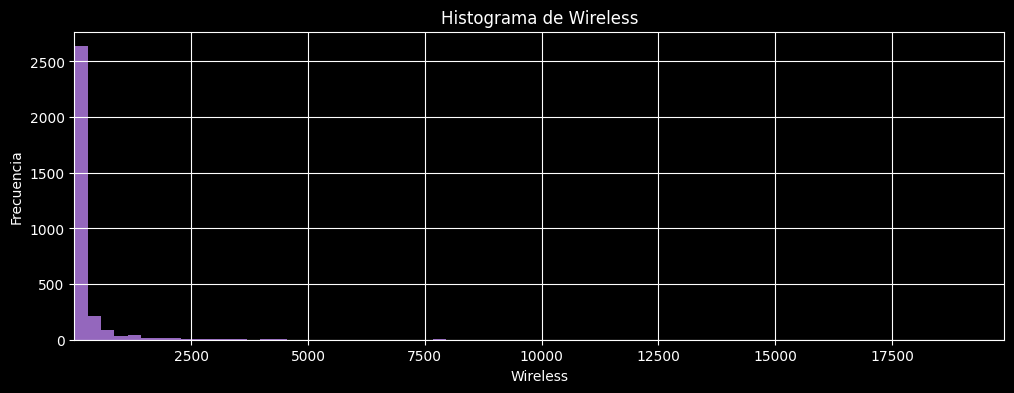

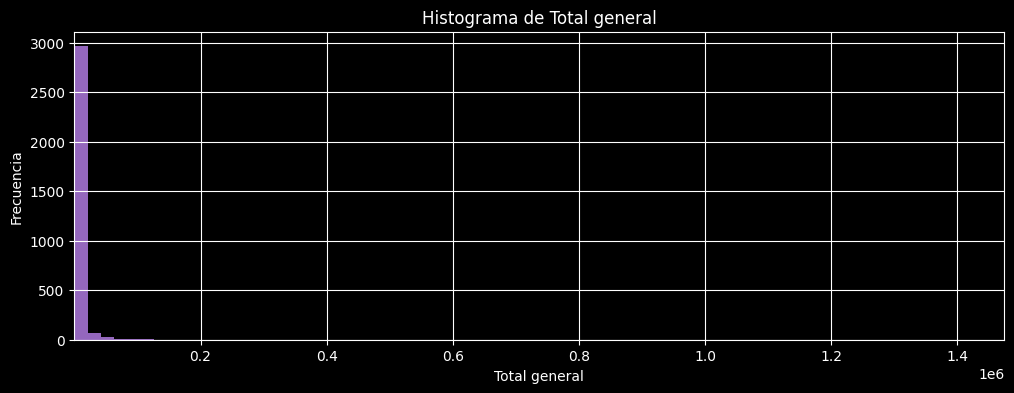

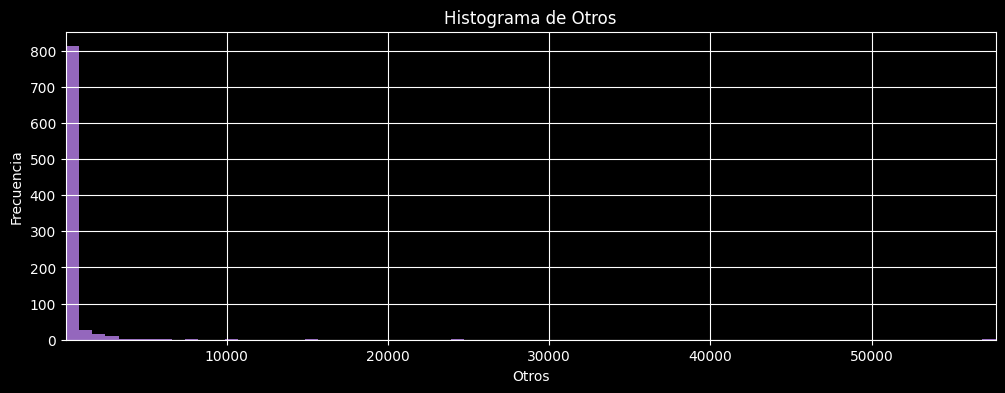

In [107]:
columnas = ['ADSL', 'Cablemodem','Dail Up', 'Fibra Optica', 'Otros1', 'Satelital', 'Wimax', 'Wireless', 'Total general', 'Otros']

for i in columnas:
    plt.figure(figsize=(12,4))
    P_P_L[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, P_P_L[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

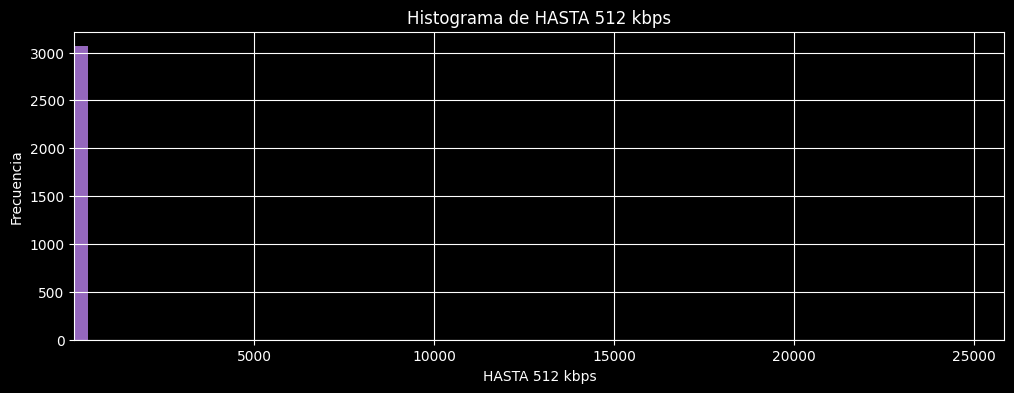

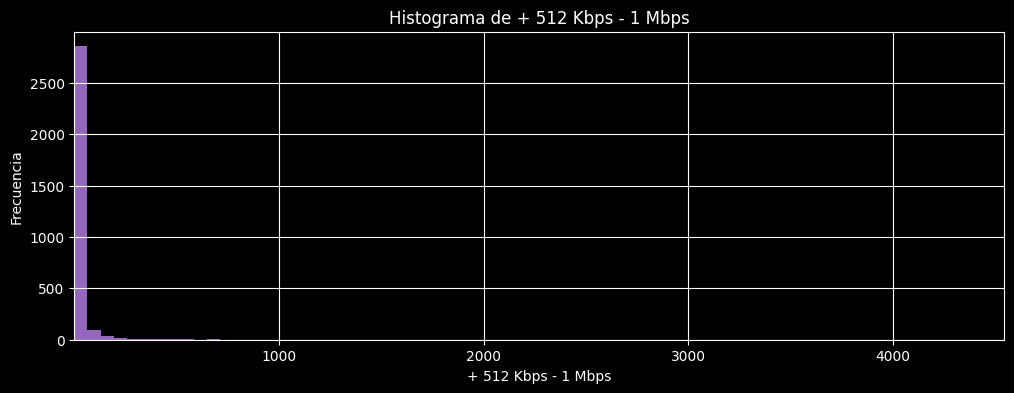

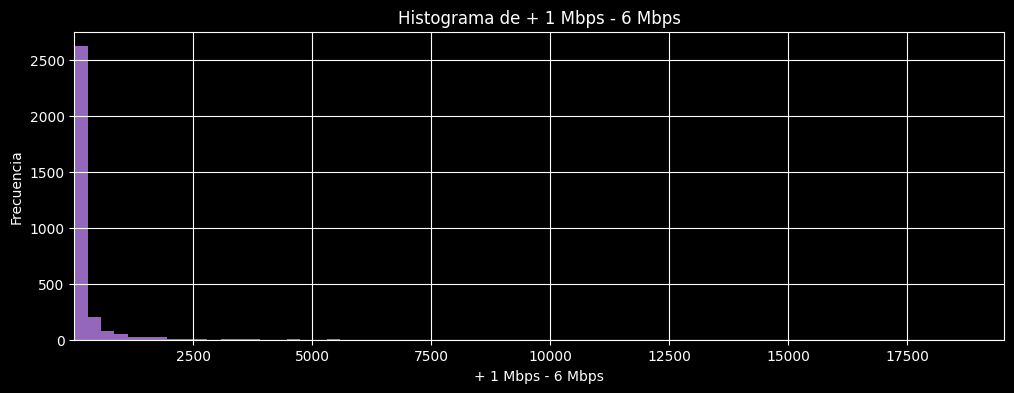

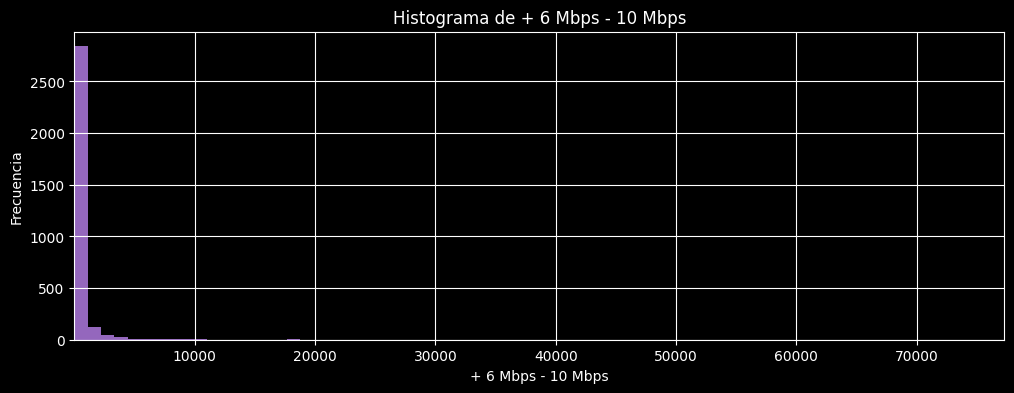

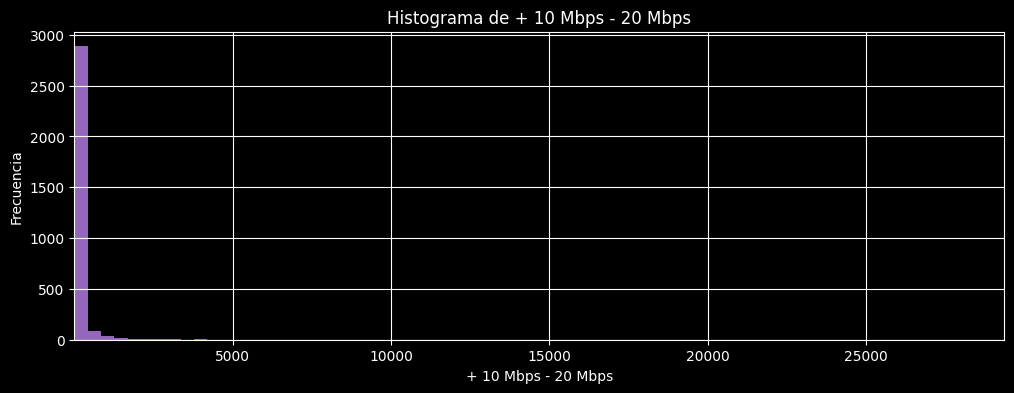

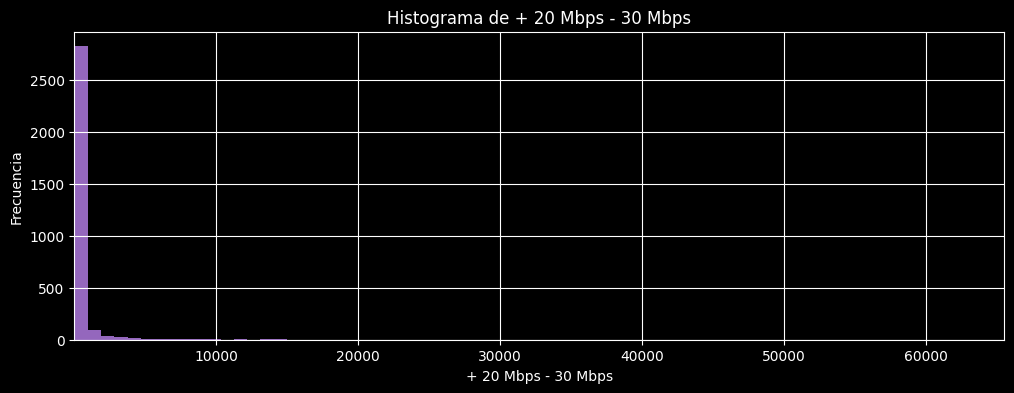

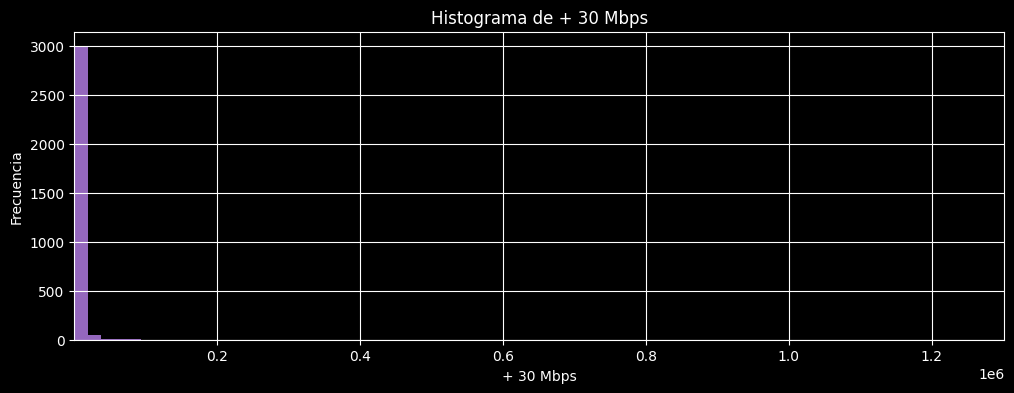

In [108]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
for i in columnas:
    plt.figure(figsize=(12,4))
    P_P_L[i].hist(bins=70,color='tab:purple')
    plt.xlim(1, P_P_L[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> En esta tabla todos los valores numericos son conteos asi que los histogramas no dan mucha información mas que los rangos y la cantidad de outliers que existen. De todas formas lo mas probable es que estos valores extremos sean valores reales de lugares con mucha dencidad poblacional.

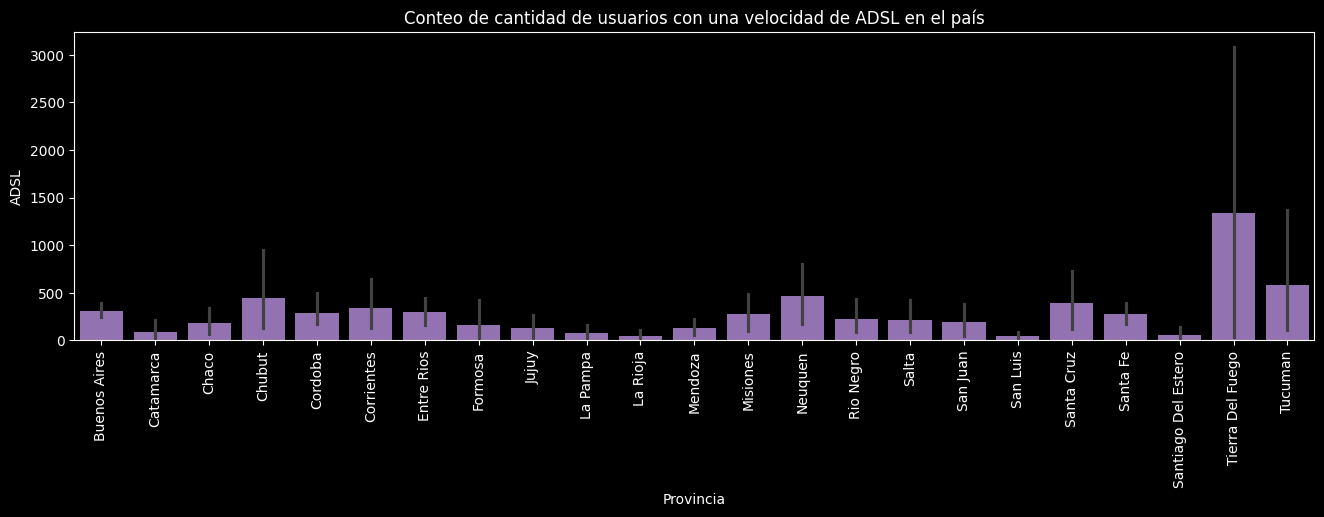

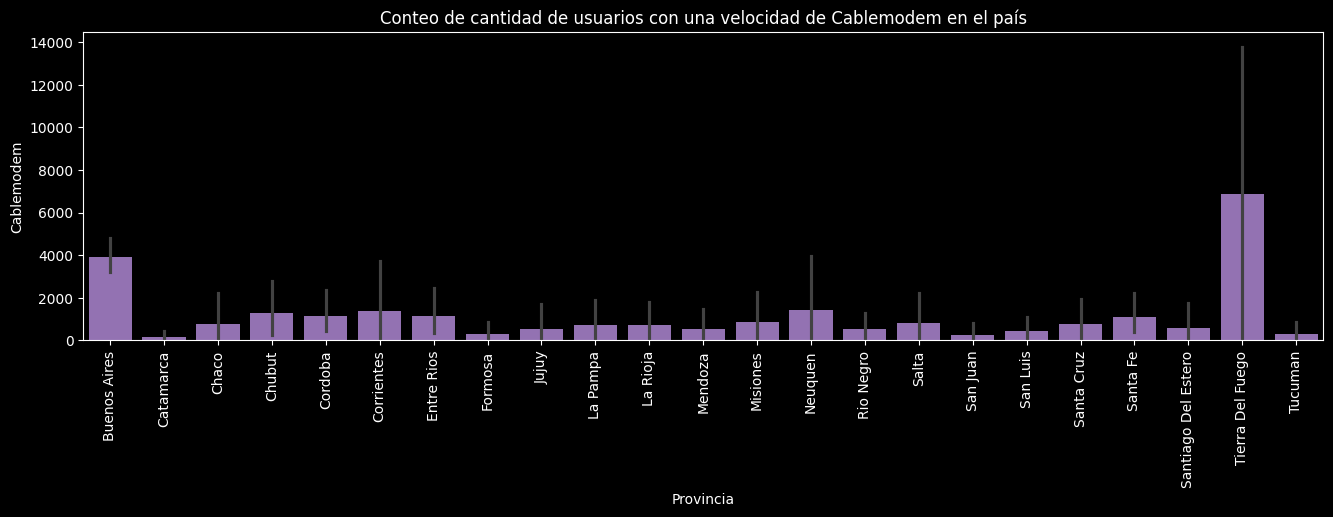

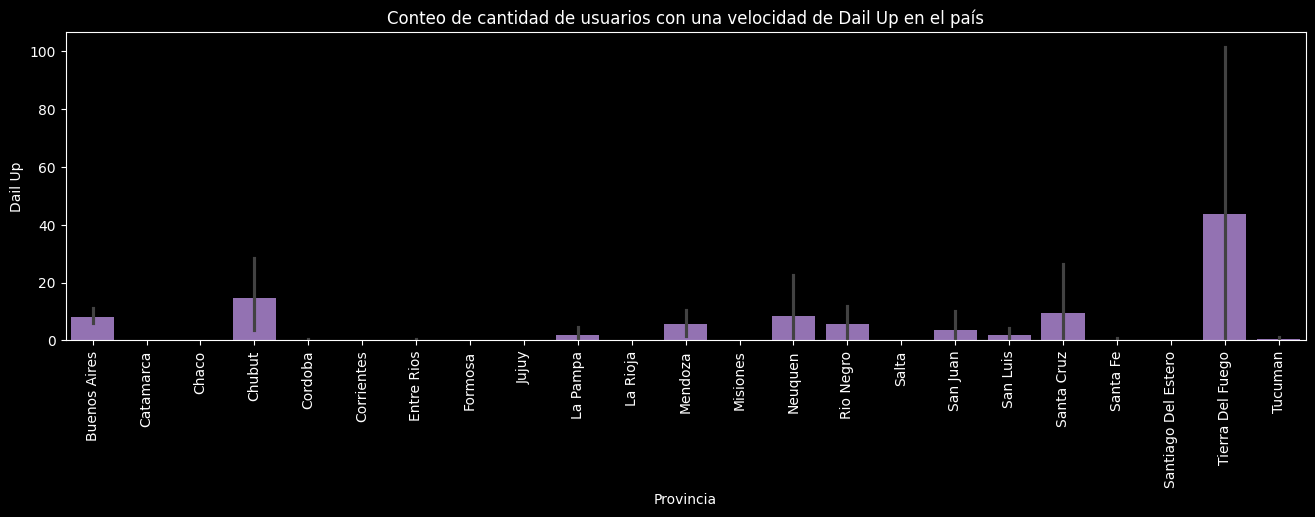

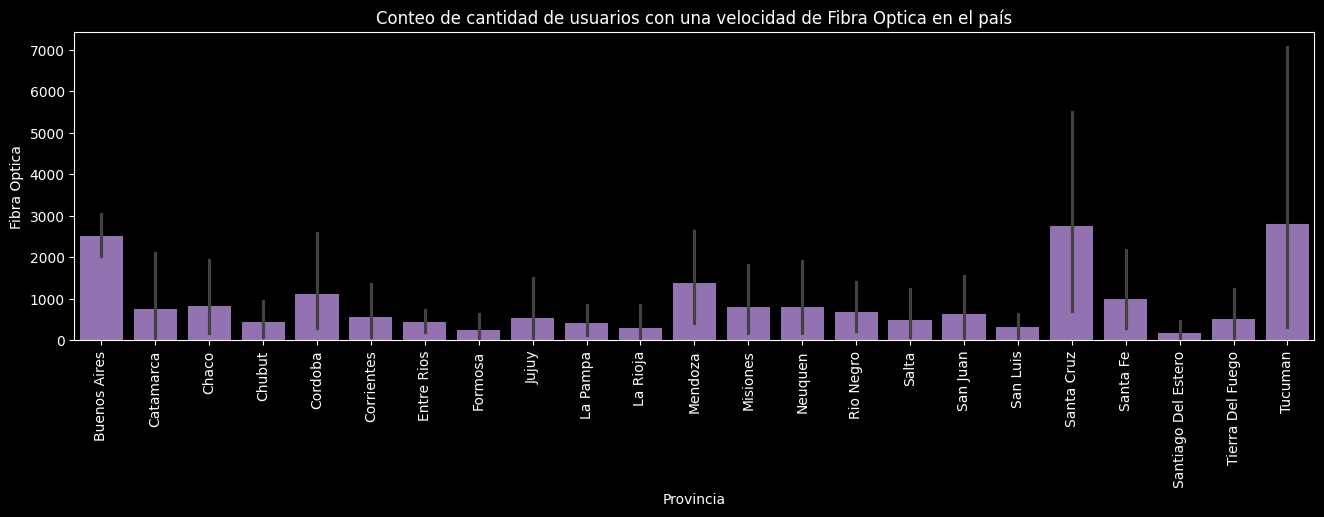

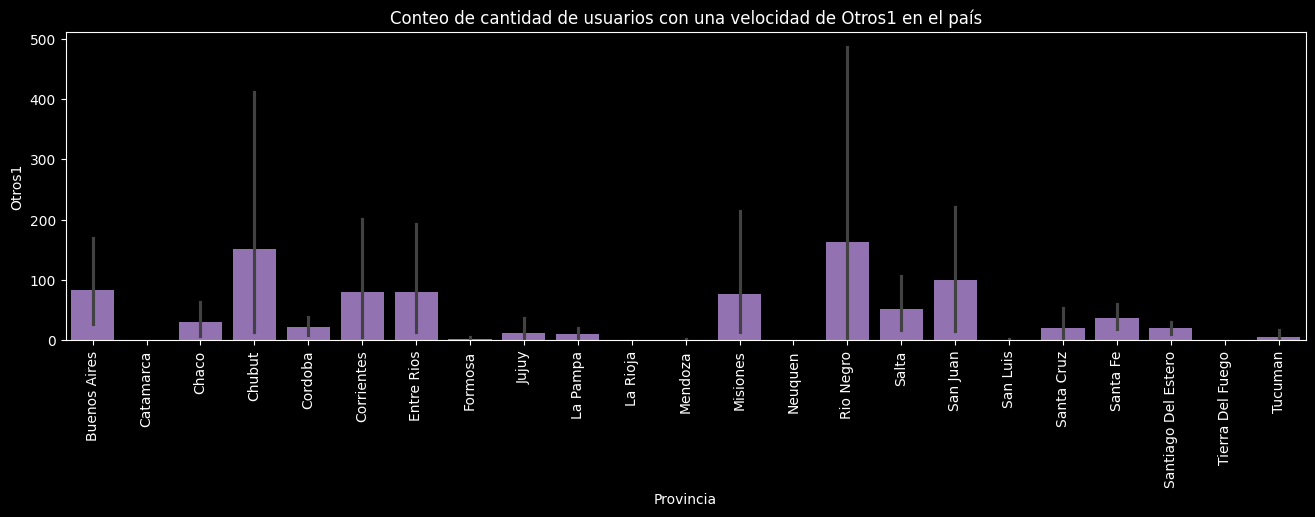

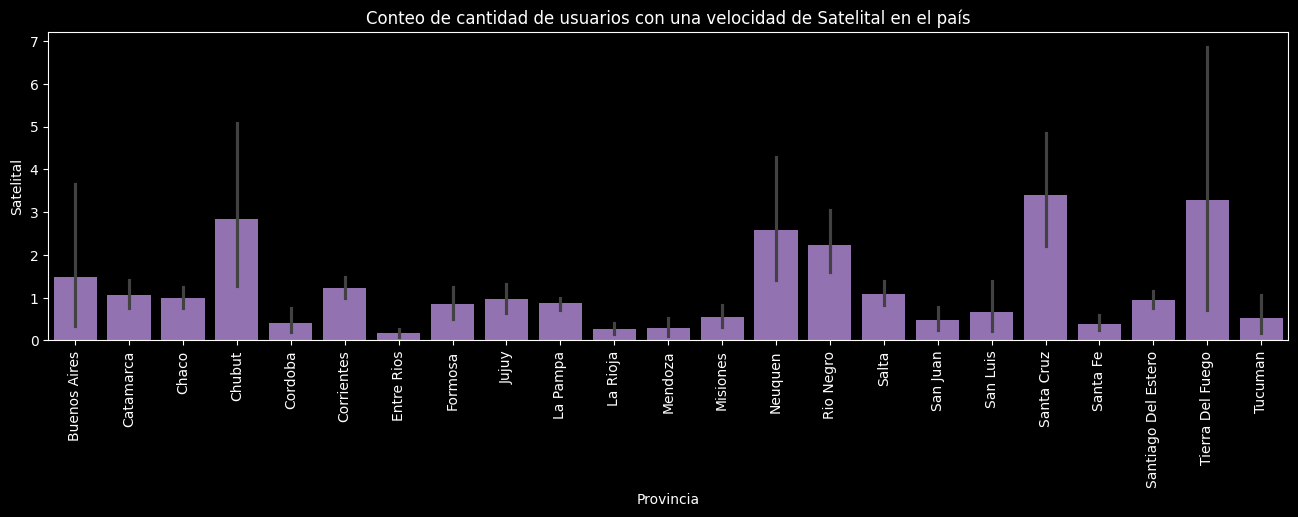

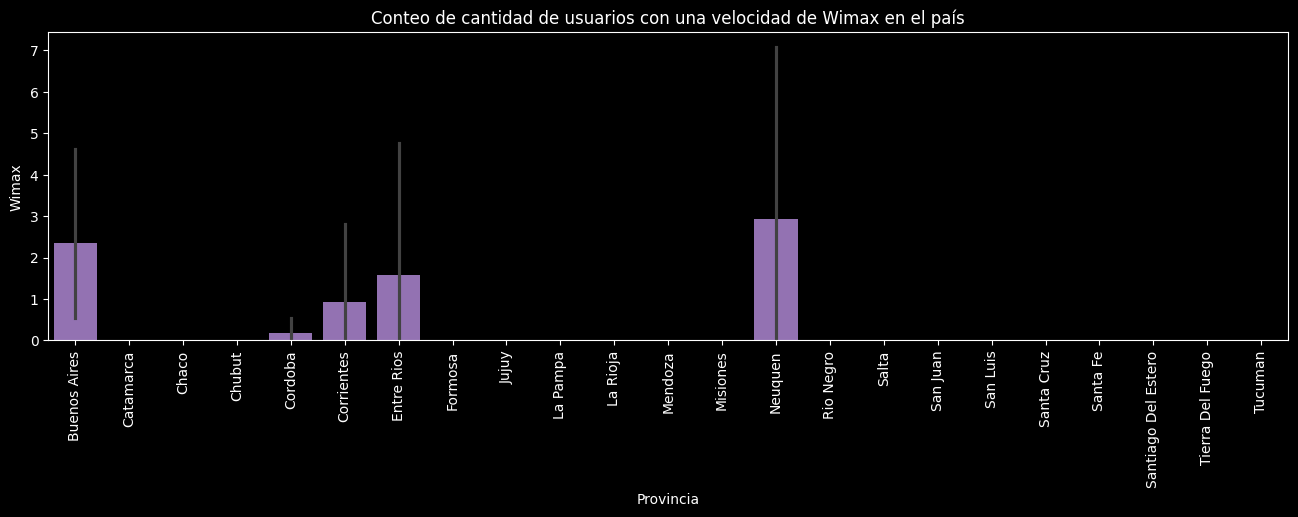

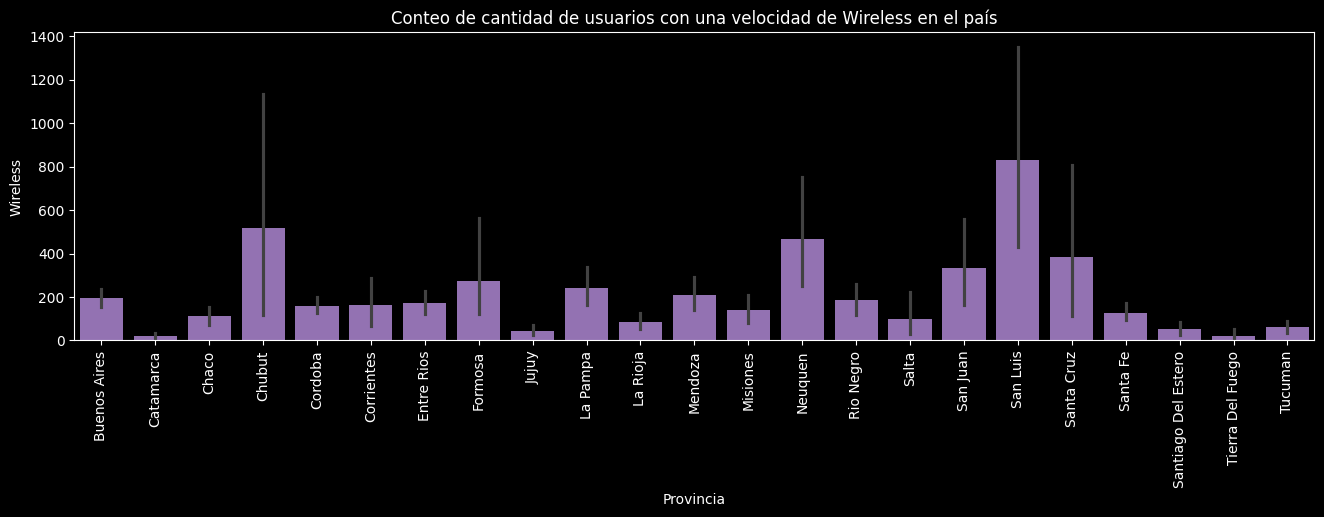

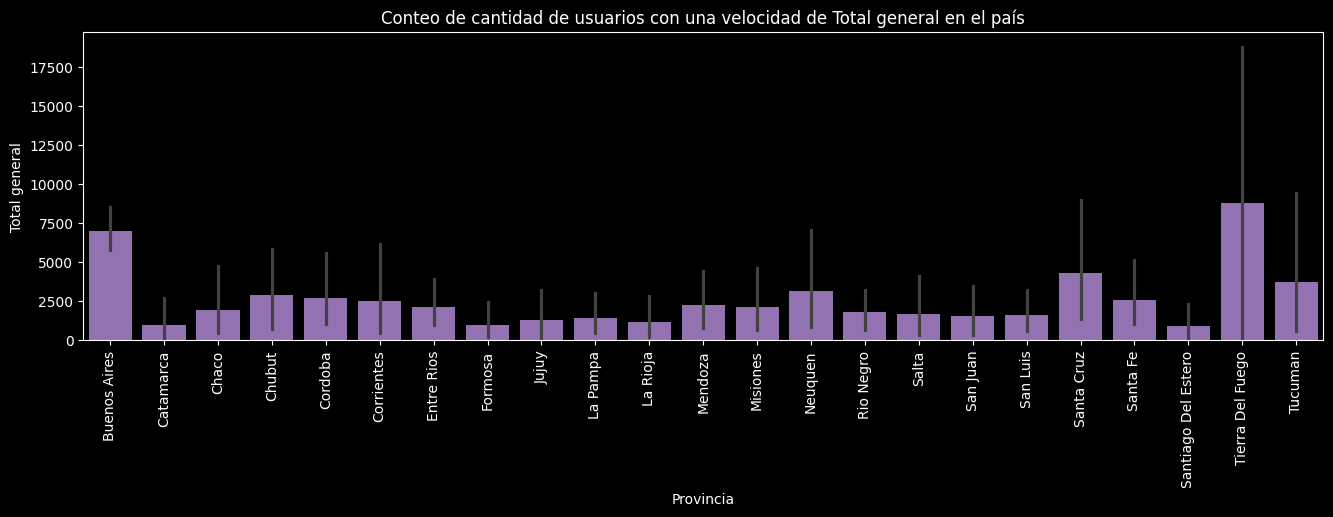

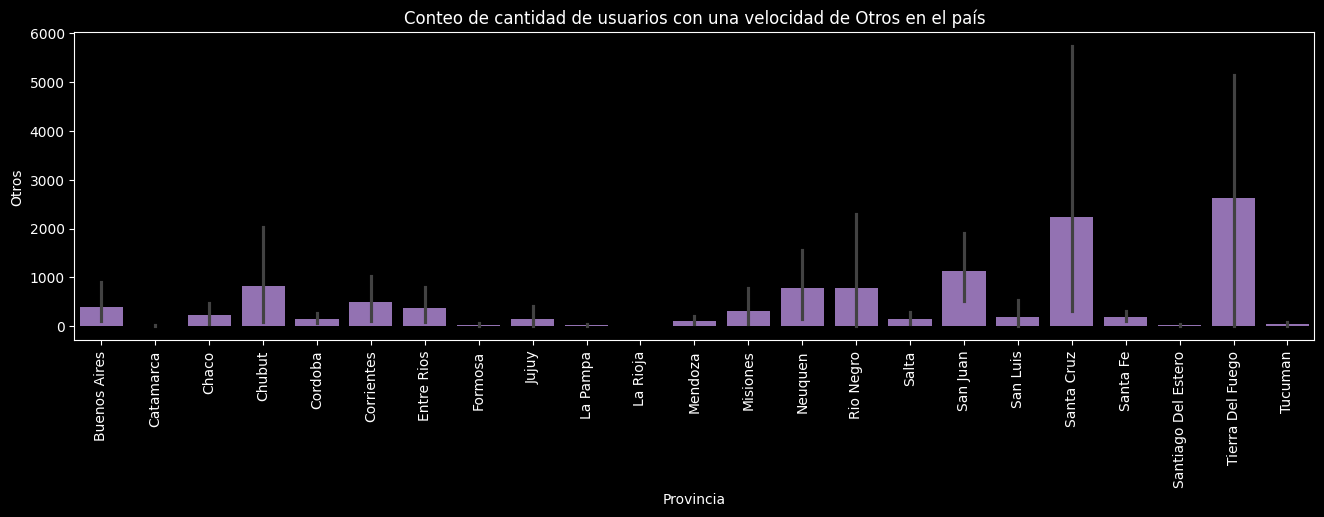

In [114]:
columnas = ['ADSL', 'Cablemodem','Dail Up', 'Fibra Optica', 'Otros1', 'Satelital', 'Wimax', 'Wireless', 'Total general', 'Otros']
for i in columnas:
    plt.figure(figsize=(16, 4))
    sns.barplot(x='Provincia', y= i, data=P_P_L[P_P_L['Provincia'] != 'Caba'], color='tab:purple')
    plt.ylabel(f'{i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=90)
    plt.title(f'Conteo de cantidad de usuarios con una velocidad de {i} en el país')
    plt.show()

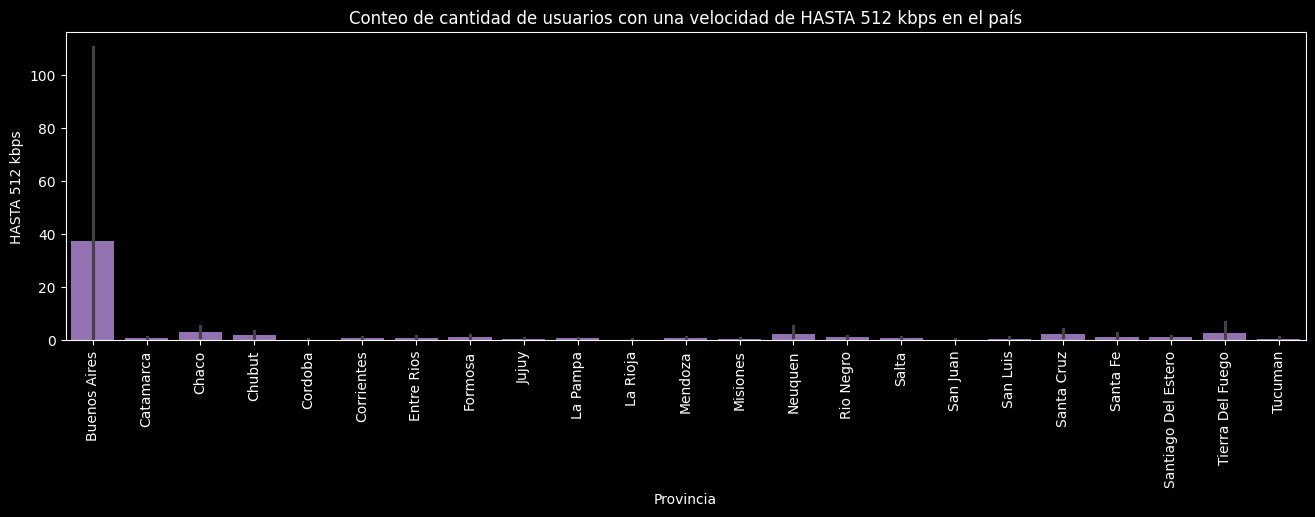

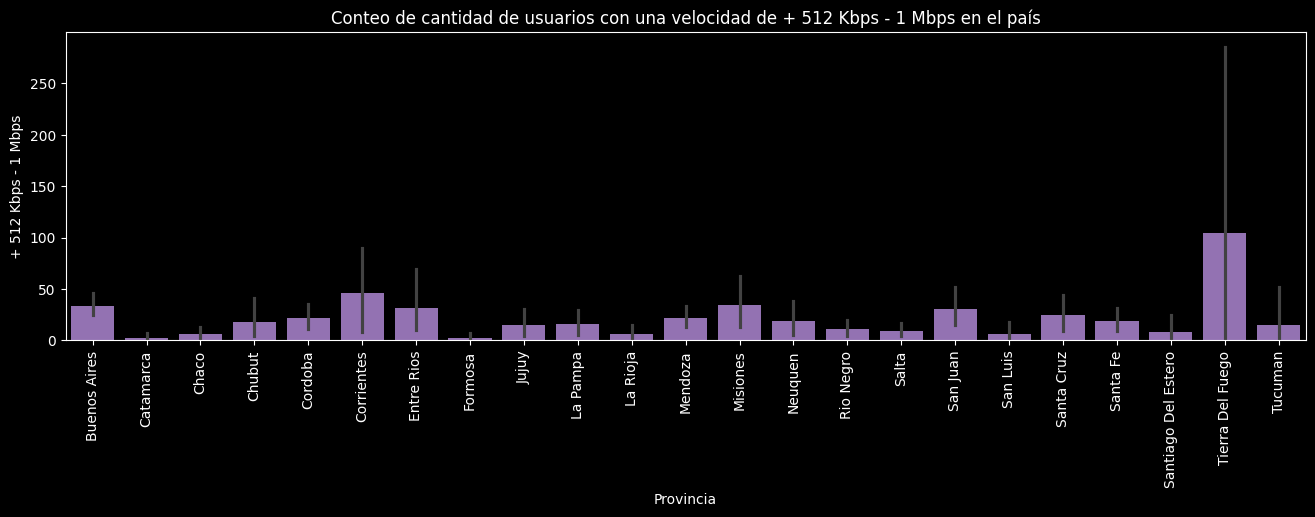

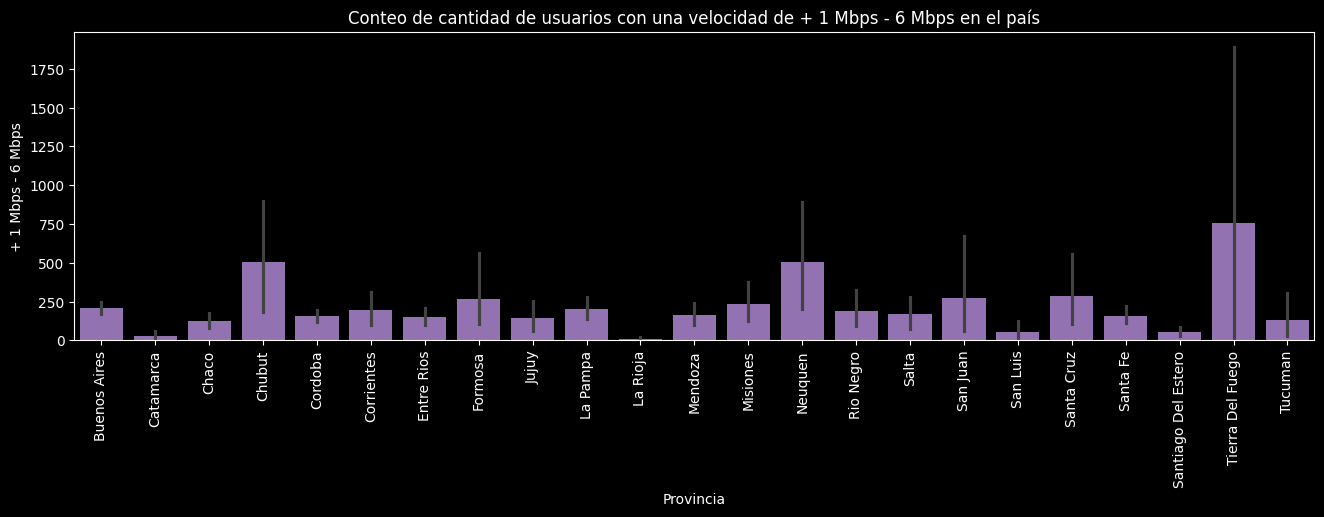

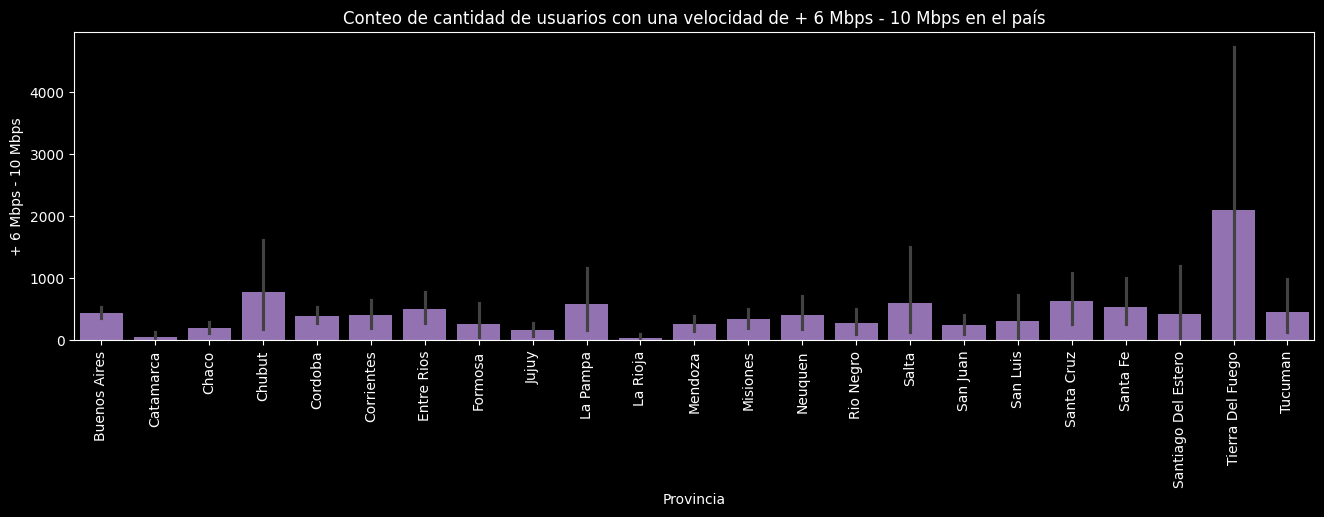

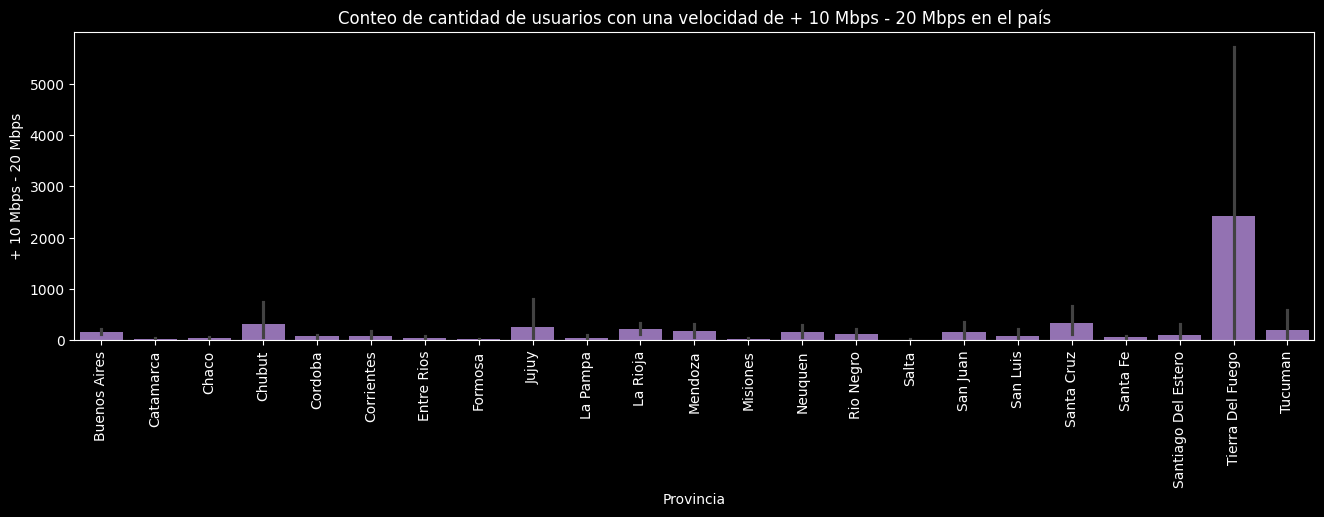

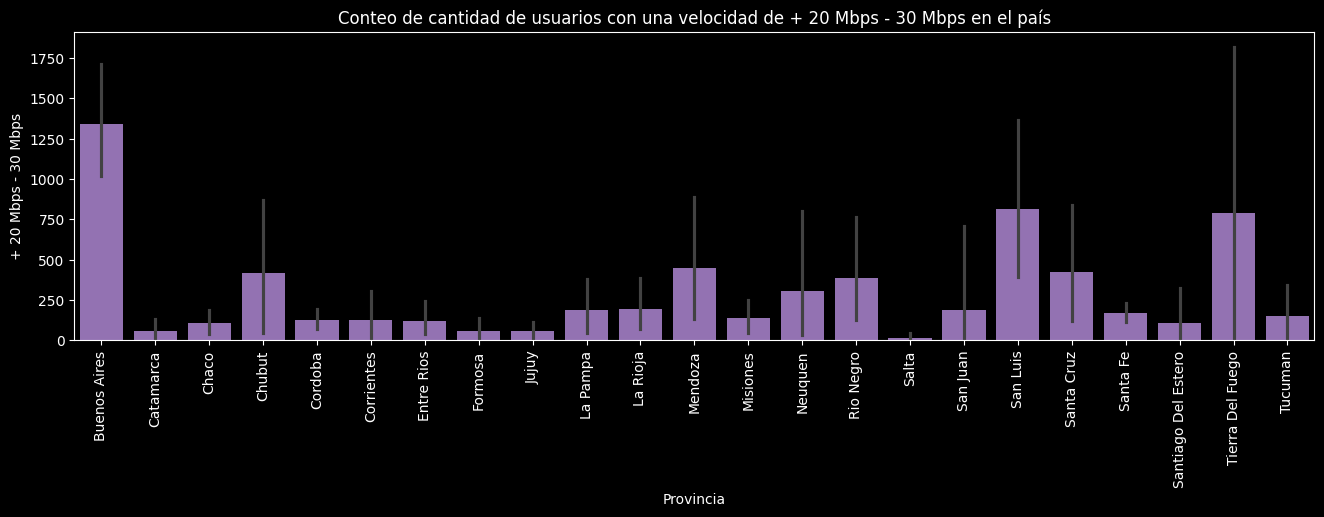

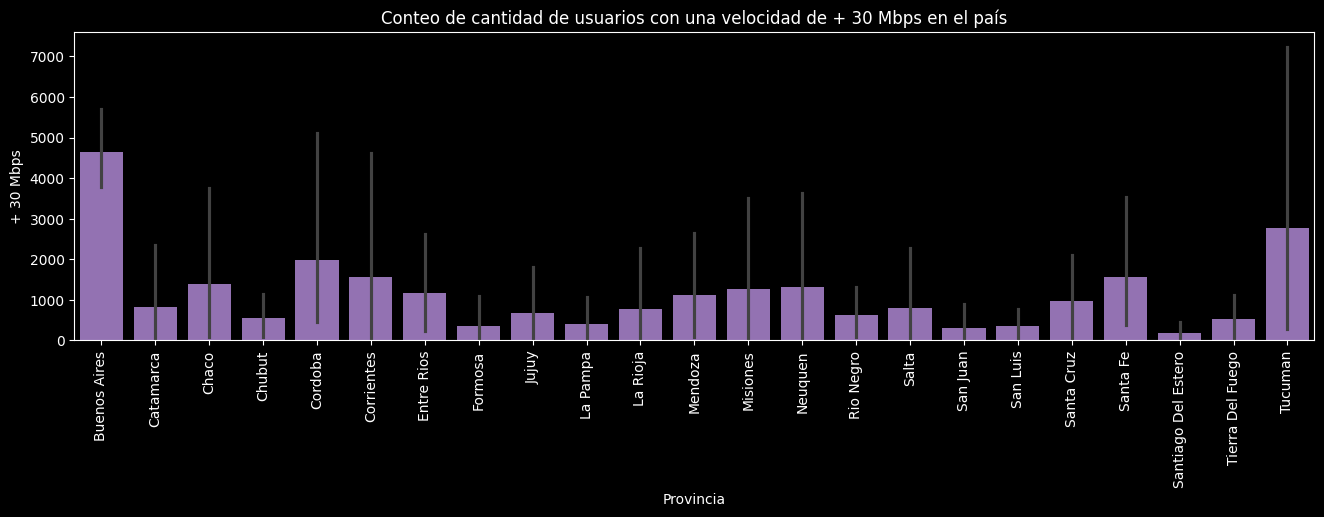

In [113]:
columnas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
for i in columnas:
    plt.figure(figsize=(16, 4))
    sns.barplot(x='Provincia', y= i, data=P_P_L[P_P_L['Provincia'] != 'Caba'], color='tab:purple')
    plt.ylabel(f'{i}')
    plt.xlabel('Provincia')
    plt.xticks(rotation=90)
    plt.title(f'Conteo de cantidad de usuarios con una velocidad de {i} en el país')
    plt.show()

> Con estas graficas se pueden ver los distintos comportamientos de las provincias y que tanto varia en la provincia (por ejemplo la variabilidad de Tierra del Fuego siempre es muy grande), esto da pie a varios analisis que se haran en la herramienta BI.

## Ganancia

### Información general

In [244]:
ganancia.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,40.0,2.018500e+03,2.908872e+00,2.014000e+03,2.016000e+03,2.018500e+03,2.021000e+03,2.023000e+03
Trimestre,40.0,2.500000e+00,1.132277e+00,1.000000e+00,1.750000e+00,2.500000e+00,3.250000e+00,4.000000e+00
Ingresos (miles de pesos),40.0,3.281153e+09,3.850304e+09,2.984054e+08,6.817891e+08,1.842255e+09,3.942974e+09,1.673760e+10
Ingresos (miles de dolares),40.0,4.915390e+07,7.221311e+06,3.787961e+07,4.380453e+07,4.796150e+07,5.311604e+07,6.769911e+07


### Valores faltantes

<Axes: >

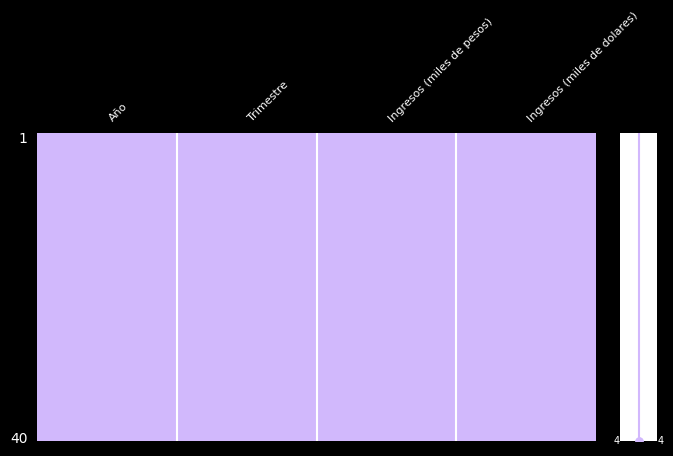

In [246]:
msno.matrix(ganancia, figsize=(8, 4), color=(0.823, 0.722, 0.992), fontsize=8)

### Duplicados

In [248]:
ganancia[ganancia.duplicated()]

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de dolares)


### Variables numéricas

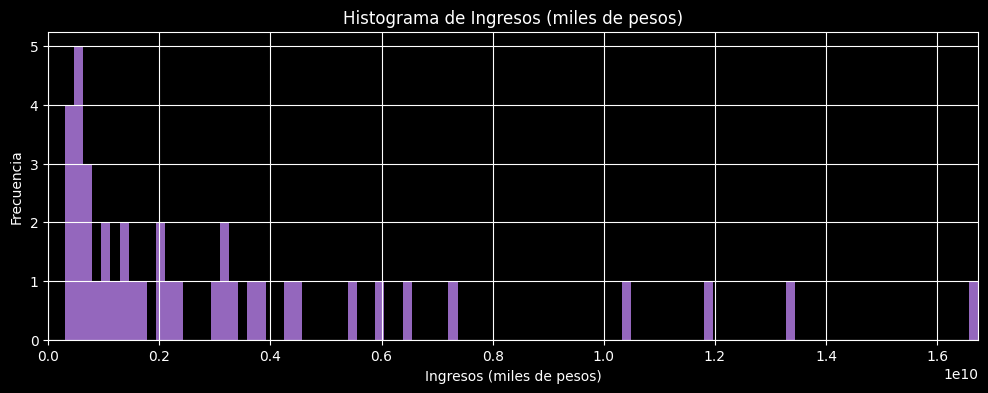

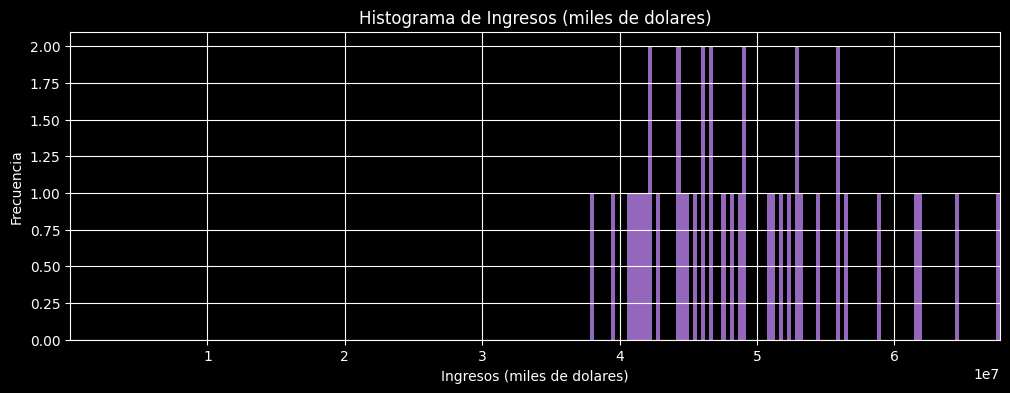

In [263]:
columnas = ['Ingresos (miles de pesos)', 'Ingresos (miles de dolares)']

for i in columnas:
    plt.figure(figsize=(12,4))
    ganancia[i].hist(bins=100,color='tab:purple')
    plt.xlim(1, ganancia[i].max())
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {i}')
    plt.show()

> Se puede ver como al dividir la ganancia por el valor del dolar se achica mucho la el rango de valores

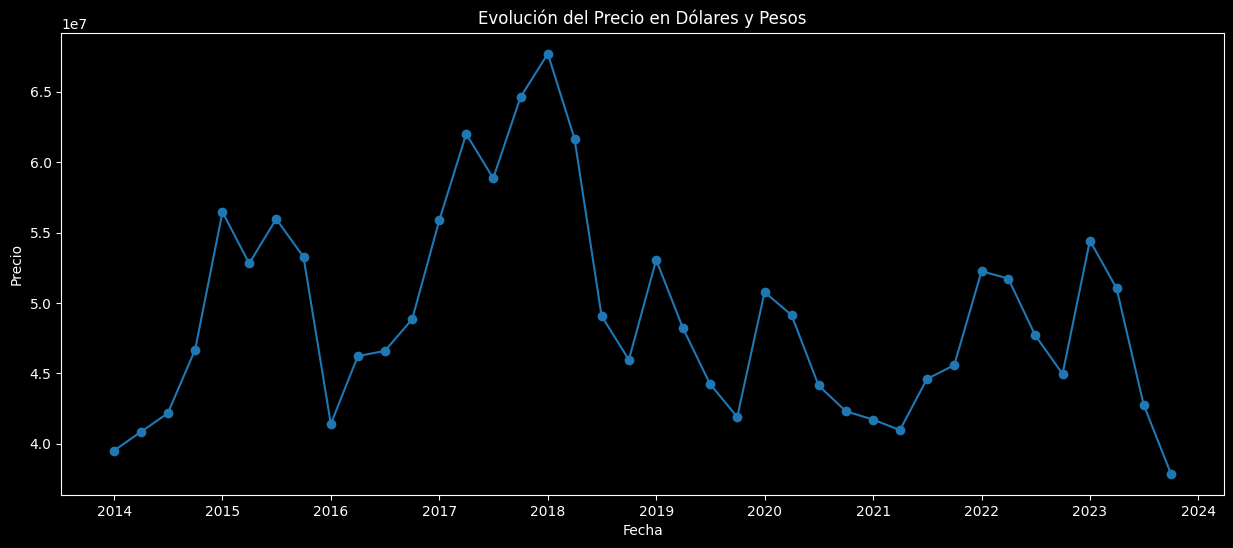

In [274]:
ganancia['Fecha'] = pd.to_datetime(ganancia['Año'].astype(str) + 'Q' + ganancia['Trimestre'].astype(str))
plt.figure(figsize=(15, 6))
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de dolares)'], label='Precio en Dólares',color='tab:blue' , marker='o')
plt.title('Evolución del Precio en Dólares y Pesos')
plt.xlabel('Fecha')
plt.ylabel('Precio')

plt.show()

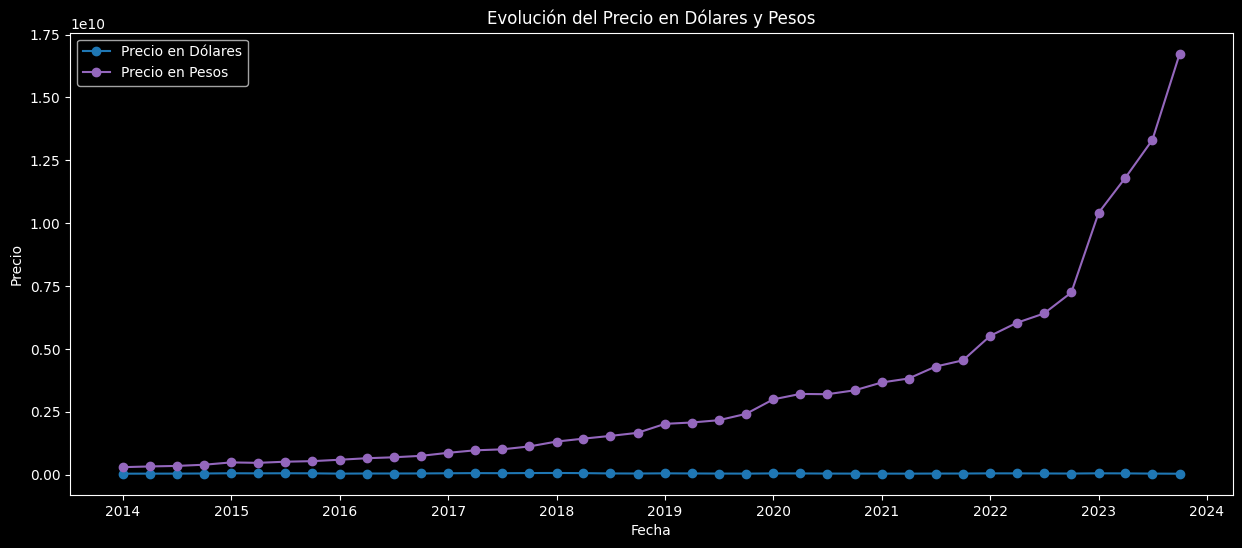

In [277]:
ganancia['Fecha'] = pd.to_datetime(ganancia['Año'].astype(str) + 'Q' + ganancia['Trimestre'].astype(str))

plt.figure(figsize=(15, 6))
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de dolares)'], label='Precio en Dólares',color='tab:blue', marker='o')
plt.plot(ganancia['Fecha'], ganancia['Ingresos (miles de pesos)'], label='Precio en Pesos',color='tab:purple',  marker='o')

plt.title('Evolución del Precio en Dólares y Pesos')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


> Como era de esperarse, el valor del dolar cambia mucho la perspectiva de las ganancias, cuando se aplica el cambio se puede ver como la mejor epoca fue en 2018 pero en general las ganancias se mantienen en los mismos rangos, ni crecen ni decresen.

# Descarga de tablas

In [275]:
A_T_P.to_csv('ATP_df.csv', index=False)

In [273]:
P_P_L.to_csv('PPL_df.csv', index=False)

In [278]:
ganancia.to_csv('ganancia_df.csv', index=False)